#**1. ⚙️Data Description and Pre-Processing**

#### `Loading Dataset and importing Libraries`


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#In order to do all task we have to import all libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Using the Path creating the dataframe=df
path="/content/drive/MyDrive/adverts (1).csv"
df=pd.read_csv(path)

#### `1.Data Understanding and Exploration`

#### `1.1 Understanding of the key features`

In [4]:
df.head()


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [5]:
#This gives the discriptive stats of the dataset
df.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


Conclusion
1. The descriptive stats showing alot of insights as we can see that
2. the Mileage has MIN=0 & MAX=999999
3. The Price has MIN=0 & MAX=99999999
4. The year_of_registration has MIN=1000 & MAX=2016

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB



*   The count of object type variable is 7

*   THe data contains the 402005 rows




In [7]:
# Get column names and their count
column_names = df.columns.tolist()
column_count = len(column_names)

# Output the results
print("Column Names:", column_names)
print("Total Number of Columns:", column_count)

Column Names: ['public_reference', 'mileage', 'reg_code', 'standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'year_of_registration', 'price', 'body_type', 'crossover_car_and_van', 'fuel_type']
Total Number of Columns: 12


In [8]:
df.shape

(402005, 12)



*   there are Coloumn=12
*   there are Rows=402005



In [9]:
df.duplicated().sum()

np.int64(0)

The above code gives the count of the duplicate values
athe reason for doing it because the duplicate values does effect our model
and it does effect on our insights changing std and others pd.value_counts.

In [10]:
missing_count = df.isnull().sum()

missing_percentage = (missing_count / len(df)) * 100

print("Count of Missing Values:")
print(missing_count)
print("\nPercentage of Missing Values:")
print(missing_percentage)

Count of Missing Values:
public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

Percentage of Missing Values:
public_reference         0.000000
mileage                  0.031592
reg_code                 7.924528
standard_colour          1.337794
standard_make            0.000000
standard_model           0.000000
vehicle_condition        0.000000
year_of_registration     8.286215
price                    0.000000
body_type                0.208206
crossover_car_and_van    0.000000
fuel_type                0.149501
dtype: float64




*   The above code shows the percentage of the nulll values in each coloumn



*   While the values like REG_CODE, STANDARD_COLOUR and year_of_registration
are greater in percentage and should be taken care of.

*   The values with less than the 1 or we can say are 0 will be ignored



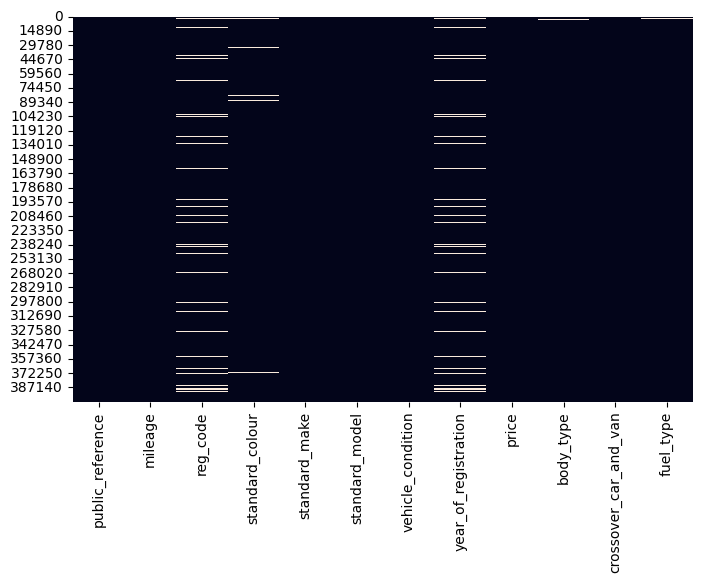

In [11]:
# Visualize the missing data
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

THe above plot shows the visual way of showing the missing values in the dataset.

#### `1.2 Feature Distribution Analysis`

The histogram plot of each attribute will be plotted below.

#### `a. Bar plot for the frequency of 'Standar_Color`

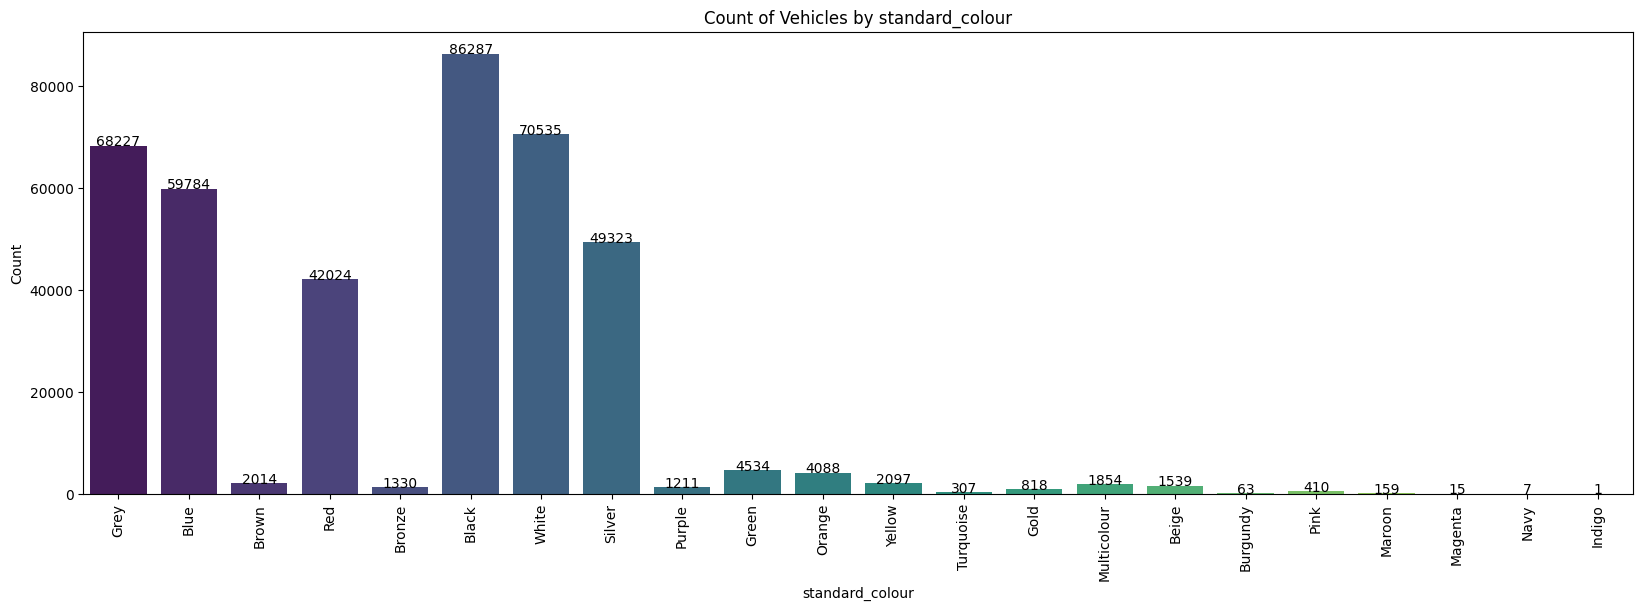

In [12]:
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='standard_colour', data=df,hue='standard_colour',legend=False,  palette='viridis')
plt.xticks(rotation=90)

# Adding count annotations
for bar in ax.patches:
    count = int(bar.get_height())  # Get the height of the bar (count value)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
            str(count), ha='center', fontsize=10)

# Set plot labels and title
plt.title('Count of Vehicles by standard_colour')
plt.xlabel('standard_colour')
plt.ylabel('Count')
plt.show()

#### `b. Histogram of the Mileage`

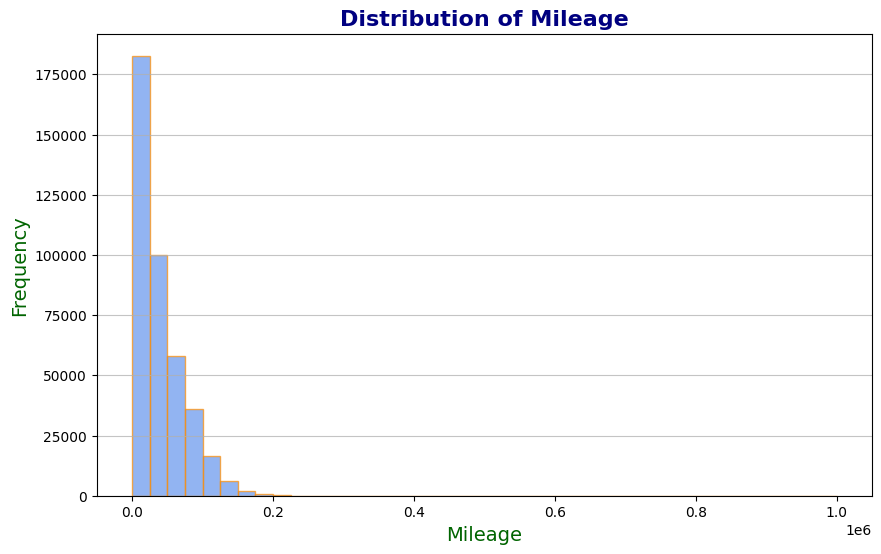

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['mileage'], bins=40, color='cornflowerblue', edgecolor='darkorange', alpha=0.7)

plt.title("Distribution of Mileage", fontsize=16, fontweight='bold', color='navy')
plt.xlabel("Mileage", fontsize=14, color='darkgreen')
plt.ylabel("Frequency", fontsize=14, color='darkgreen')
plt.grid(axis='y', alpha=0.75)
plt.show()


*   The mileage distribution is right skewed.
*   The distributionis right skewed because if the outliers like high mileage cars that shifted the skewness of the plot.

#### `c. Histogram for the Price feature`

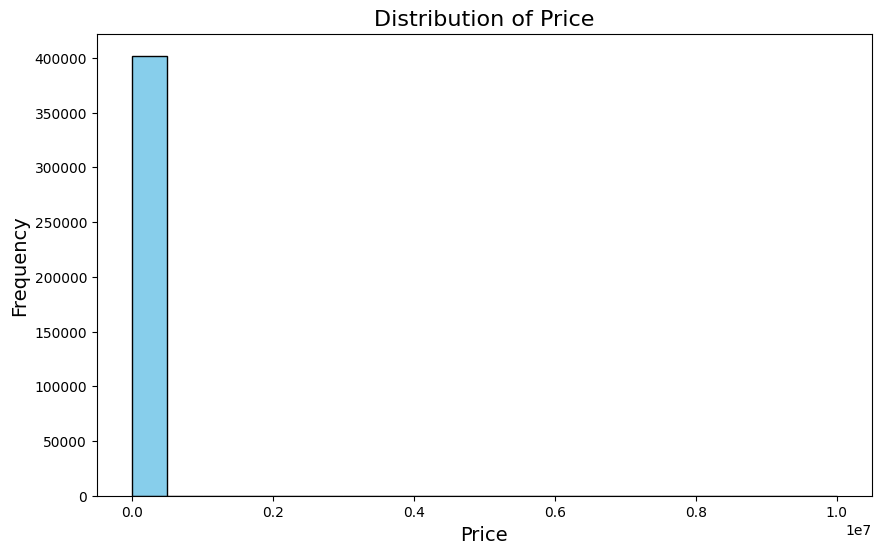

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Price", fontsize=16)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()



*   the single straight line in the distribution shows that the data is only distributed around 0 to 0.1 e7
*   the values other than that are all outliers/noise which needs to be dealt



#### `d. Year of registration Distribution`

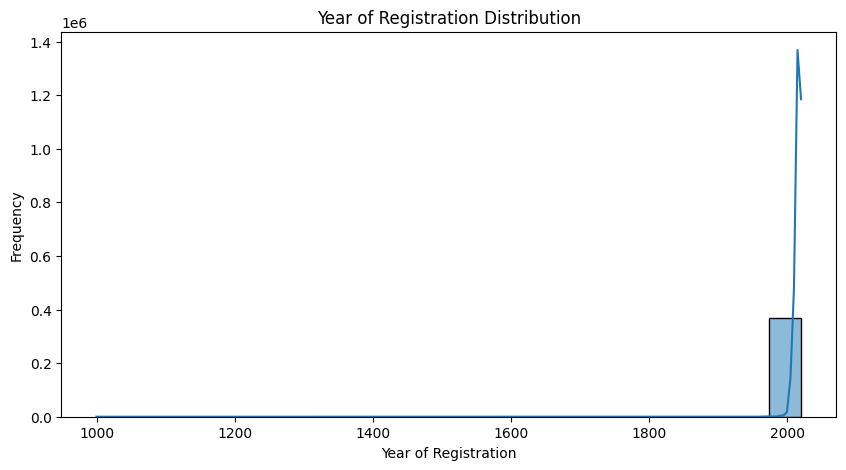

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(df['year_of_registration'], bins=22, kde=True)
plt.title('Year of Registration Distribution')
plt.xlabel('Year of Registration')
plt.ylabel('Frequency')
plt.show()




*   The first car to be registered was in 1904 so other than that are the outleirs/noise which should be removed
*   The data is mostly distibuted around 2000 which can be seen in a graph.



#### `e. The distribution of the fuel type`

<ipython-input-16-6d017f4d2d8a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='fuel_type', data=df, palette='viridis')


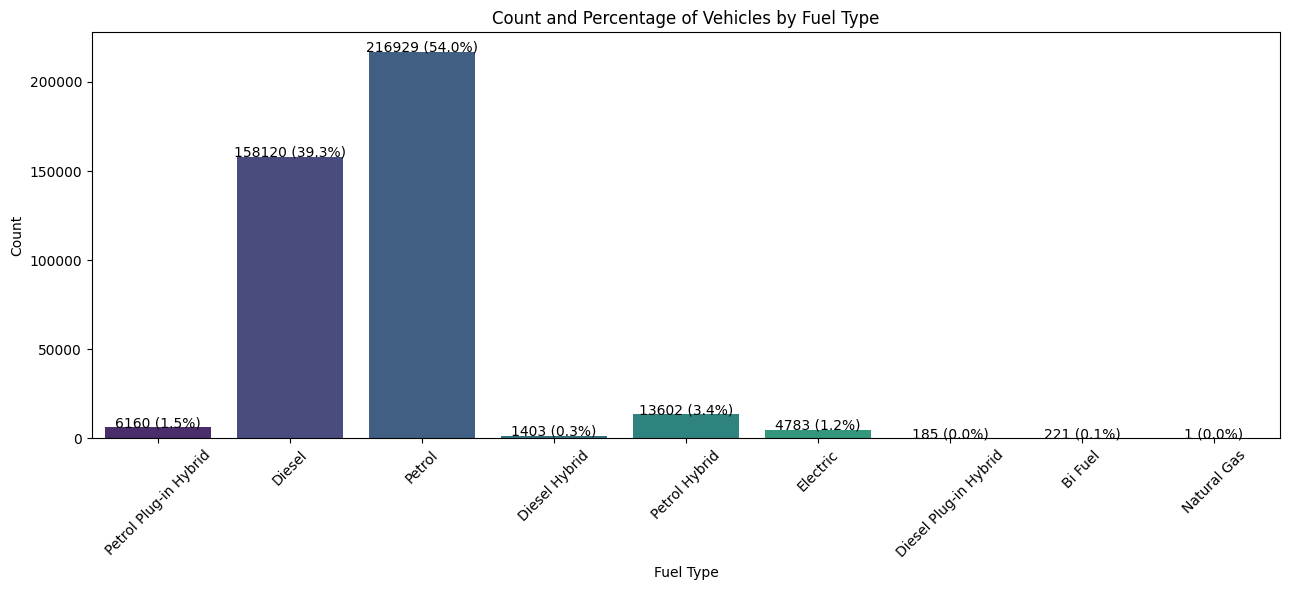

In [16]:
fuel_counts = df['fuel_type'].value_counts()
total_count = len(df)

plt.figure(figsize=(13, 6))
ax = sns.countplot(x='fuel_type', data=df, palette='viridis')

for bar in ax.patches:
    count = int(bar.get_height())  # Get the height of the bar (count value)
    percentage = (count / total_count) * 100  # Calculate percentage
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
            f'{count} ({percentage:.1f}%)', ha='center', fontsize=10)

plt.title('Count and Percentage of Vehicles by Fuel Type')
plt.xlabel('Fuel Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### `f. The distribution of the Vehicle Condition`

<ipython-input-17-96f16dcf1781>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='vehicle_condition', data=df, palette='viridis')


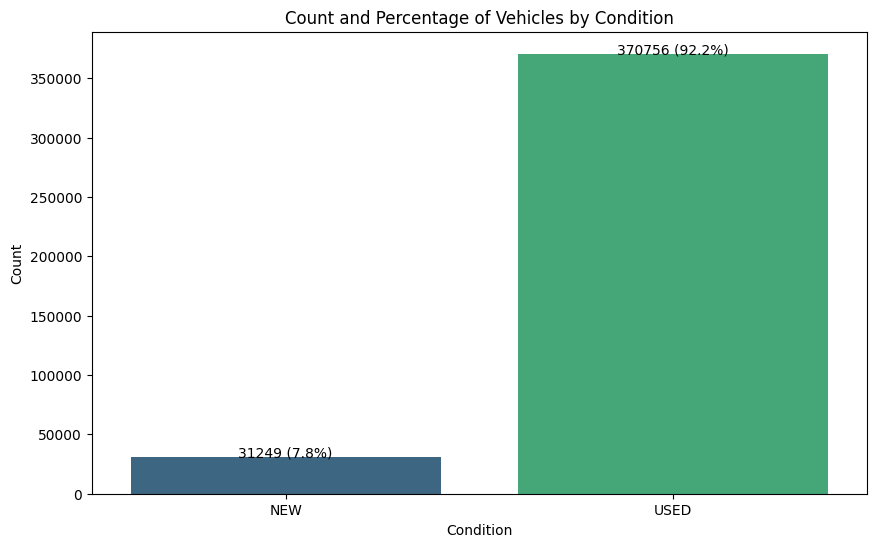

In [17]:
condition_counts = df['vehicle_condition'].value_counts()
total_count = len(df)
condition_percentages = (condition_counts / total_count) * 100

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='vehicle_condition', data=df, palette='viridis')

for bar in ax.patches:
    count = int(bar.get_height())  # Get the height of the bar (count value)
    percentage = (count / total_count) * 100  # Calculate percentage
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
            f'{count} ({percentage:.1f}%)', ha='center', fontsize=10)

plt.title('Count and Percentage of Vehicles by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

#### `g. The distribution of the standard_model`

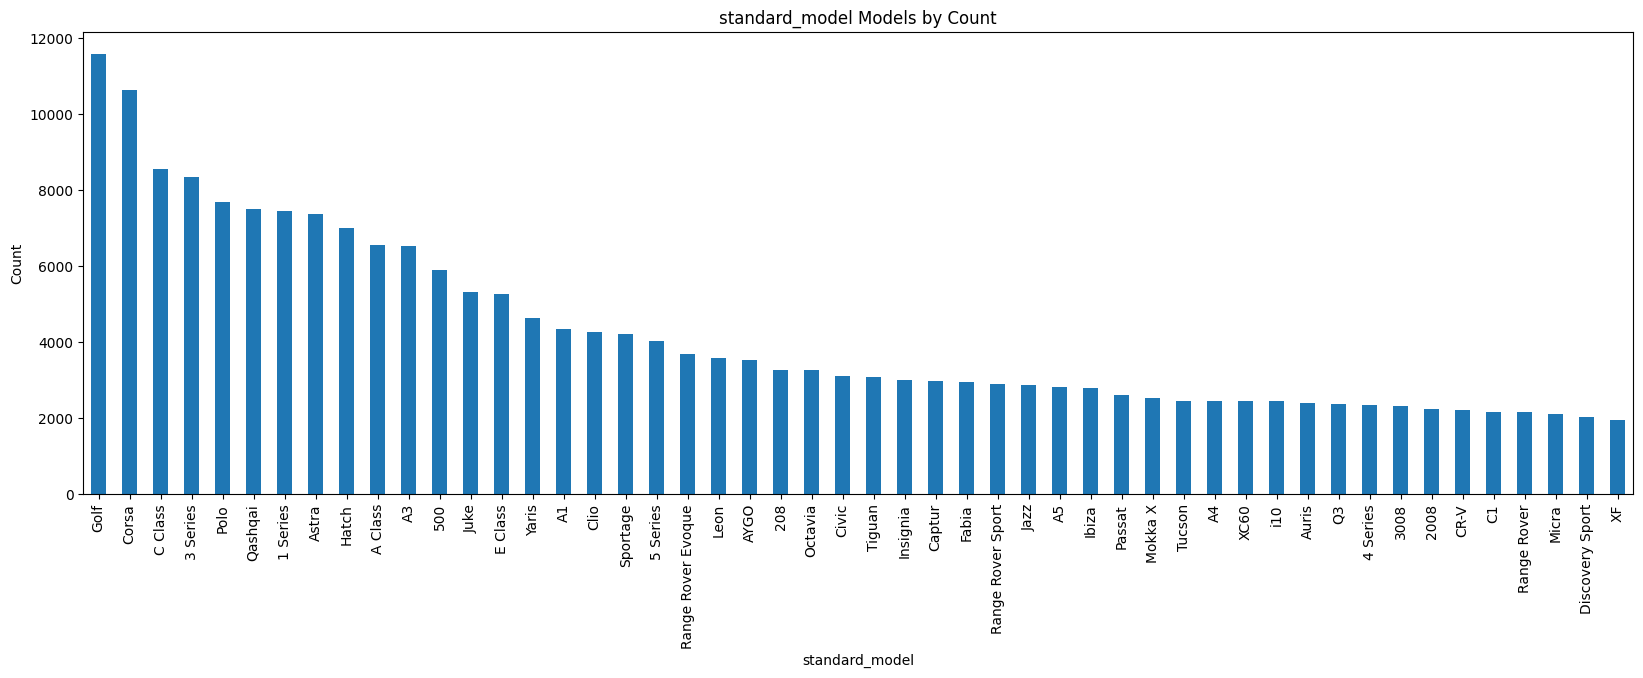

In [18]:
df['standard_model'].value_counts().head(50).plot(kind='bar', figsize=(20, 6))
plt.title('standard_model Models by Count')
plt.xlabel('standard_model')
plt.ylabel('Count')
plt.show()

#### `h. The distribution of the standard_make`

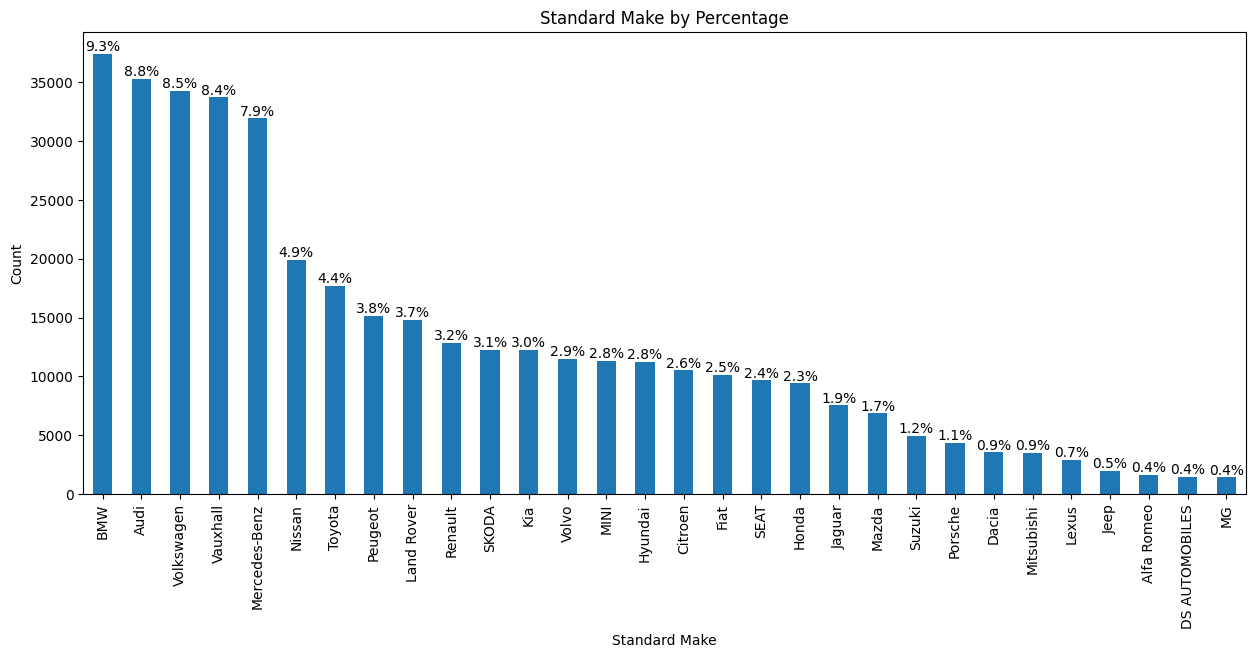

In [19]:
make_counts = df['standard_make'].value_counts()
total_count = make_counts.sum()
make_percentages = (make_counts / total_count) * 100

ax = make_counts.head(30).plot(kind='bar', figsize=(15, 6))
plt.title('Standard Make by Percentage')
plt.xlabel('Standard Make')
plt.ylabel('Count')

for p in ax.patches:
    percentage = (p.get_height() / total_count) * 100  # Calculate percentage
    ax.annotate(
        f'{percentage:.1f}%',  # Display percentage
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of text
        ha='center', va='bottom', fontsize=10  # Align text and font size
    )

plt.show()

#### `I. The distribution of body_type`

<ipython-input-20-d6c15e3a4e7a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='body_type', data=df, palette='viridis')


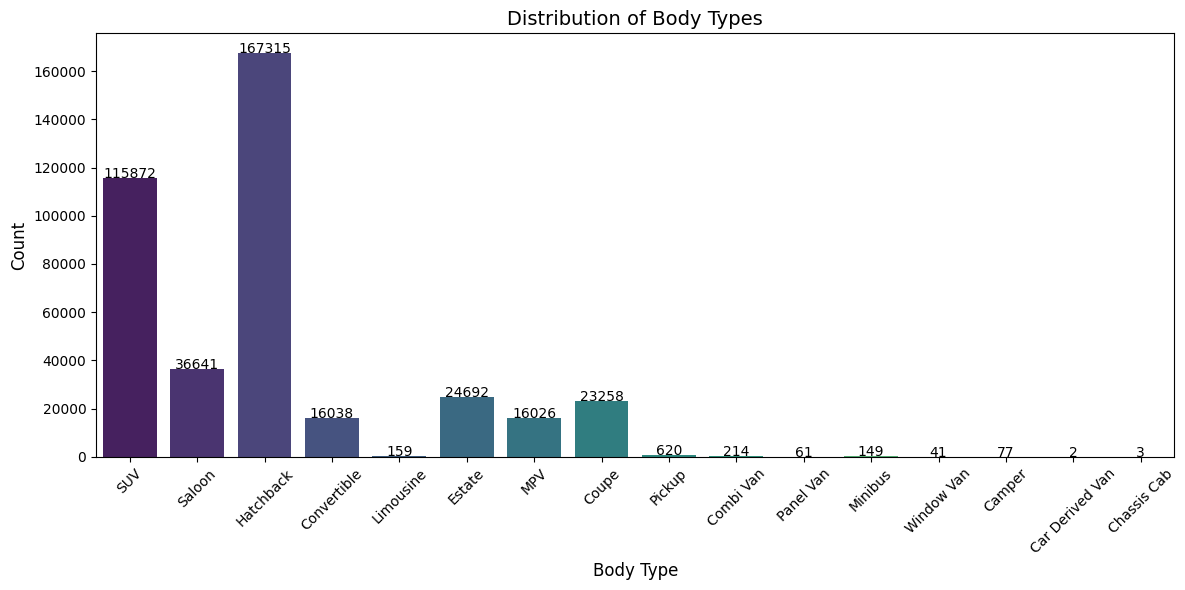

In [20]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='body_type', data=df, palette='viridis')
for bar in ax.patches:
    count = int(bar.get_height())  # Get the height of each bar (count)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
            str(count), ha='center', fontsize=10)

plt.title('Distribution of Body Types', fontsize=14)
plt.xlabel('Body Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

#### `2. Data Preprocessing`

#### `2.1 Data Cleaning`

Note: As year of registration is important for our dataset so we need to remove the missing values from it.

Note: The number of missing values in each category can be seen by this code.

In [21]:
missing_count = df.isnull().sum()

missing_percentage = (missing_count / len(df)) * 100

print("Count of Missing Values:")
print(missing_count)
print("\nPercentage of Missing Values:")
print(missing_percentage)

Count of Missing Values:
public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

Percentage of Missing Values:
public_reference         0.000000
mileage                  0.031592
reg_code                 7.924528
standard_colour          1.337794
standard_make            0.000000
standard_model           0.000000
vehicle_condition        0.000000
year_of_registration     8.286215
price                    0.000000
body_type                0.208206
crossover_car_and_van    0.000000
fuel_type                0.149501
dtype: float64


#### `Targeting the Year of registration and reg code.`

In [22]:
# Filter rows where 'year_of_registration' is NaN
nan_values = df[df['year_of_registration'].isnull()]

# Print rows with NaN values in 'year_of_registration'
print("Rows with NaN in 'year_of_registration':")
print(nan_values)

Rows with NaN in 'year_of_registration':
        public_reference  mileage reg_code standard_colour standard_make  \
0        202006039777689      0.0      NaN            Grey         Volvo   
17       201911043995897      5.0      NaN             NaN        Nissan   
19       202008272998331      0.0      NaN           White    Volkswagen   
37       202001306737473      0.0      NaN           White          Fiat   
44       202003178531910      0.0      NaN             NaN         Honda   
...                  ...      ...      ...             ...           ...   
401860   202010024501227     10.0      NaN          Silver    Mitsubishi   
401890   202010104843364      5.0      NaN             Red           BMW   
401902   202010134960554     10.0      NaN           White           BMW   
401905   202010144983518      0.0      NaN             Red    Land Rover   
401971   202010285515882     10.0      NaN            Grey        Nissan   

            standard_model vehicle_condition  

`Conclusion:`
As we can see that the most of the data where year of registration is null is for new cars . In order to check it lets see weather it is true or not

#### `Now Checking if all these rows have 'New' in 'vehicle_condition'`

In [23]:
all_new_condition = (nan_values['vehicle_condition'] == 'New').all()
if all_new_condition:
    print("All NaN values in 'year_of_registration' correspond to 'New' in 'vehicle_condition'.")
else:
    print("Not all NaN values in 'year_of_registration' correspond to 'New' in 'vehicle_condition'.")

Not all NaN values in 'year_of_registration' correspond to 'New' in 'vehicle_condition'.


#### `Conclusion:`
 The output is "Not all NaN values in 'year_of_registration' correspond to 'New' in 'vehicle_condition'."

#### `Now we are going to check the null values which are not for the new cars for year of registration.`

In [24]:
df['vehicle_condition'] = df['vehicle_condition'].str.strip().str.lower()

# Filter rows where 'year_of_registration' is NaN but 'vehicle_condition' is NOT 'new'
non_new_condition_rows = df[(df['year_of_registration'].isnull()) & (df['vehicle_condition'] != 'new')]

# Count the rows
non_new_condition_count = len(non_new_condition_rows)

print(f"Count of rows with NaN 'year_of_registration' and 'vehicle_condition' not equal to 'New': {non_new_condition_count}")
print("Rows that meet this condition:")
print(non_new_condition_rows)

Count of rows with NaN 'year_of_registration' and 'vehicle_condition' not equal to 'New': 2062
Rows that meet this condition:
        public_reference  mileage reg_code standard_colour standard_make  \
54       202007030806426  30000.0       18             Red      Vauxhall   
83       202008222801747  42847.0       61             Red         Honda   
865      202010084741550  43130.0       66           White    Land Rover   
968      202010305607535  63369.0       17            Blue         SKODA   
1256     202010225294466  18715.0       68           White         Volvo   
...                  ...      ...      ...             ...           ...   
400536   202010094805399  40523.0      NaN             Red       Peugeot   
400725   202008252905656     45.0       20          Silver    Land Rover   
401314   202010315635541  12522.0       67             Red         Dacia   
401323   201909222504136  46000.0       13            Grey    Volkswagen   
401357   202007111114611     10.0     

#### `Conclusion:`
There are 2062 vehicles that are 'used' and still the nan value is is in vehicle registration year.

#### `Now as we know the amount of new cars having null values and the used ones as we can see that the used ones have reg code filled but the year of registration is null Only`
Checking  rows where:
1. 'year_of_registration' is NaN
2. 'vehicle_condition' is 'Used'
3. 'reg_code' is also NaN

In [25]:
null_year_used_condition_rows = df[
    (df['year_of_registration'].isnull()) &
    (df['vehicle_condition'].str.strip().str.lower() == 'used') &
    (df['reg_code'].isnull())
]

# Count the rows
null_year_used_condition_count = len(null_year_used_condition_rows)

print(f"Count of rows with null 'year_of_registration', 'Used' condition, and null 'reg_code': {null_year_used_condition_count}")
print("Rows that meet these conditions:")
print(null_year_used_condition_rows)

Count of rows with null 'year_of_registration', 'Used' condition, and null 'reg_code': 321
Rows that meet these conditions:
        public_reference  mileage reg_code standard_colour standard_make  \
1510     202010054642656  13406.0      NaN           White    Land Rover   
2631     202010235350805   1000.0      NaN            Blue      Maserati   
4766     202003238706011      NaN      NaN            Grey        Subaru   
6998     202010225284269    160.0      NaN            Grey       McLaren   
7517     202009234093511  11413.0      NaN             NaN          MINI   
...                  ...      ...      ...             ...           ...   
392499   202010064681927  83555.0      NaN           Black    Land Rover   
392730   202009093528195  38796.0      NaN            Grey         Rover   
396985   202001256559400  29000.0      NaN           Black   Lamborghini   
399728   202008262969804  12812.0      NaN          Silver   Rolls-Royce   
400536   202010094805399  40523.0      N

#### `Conclusion:`
There are 321 rows where registration code, year of registration is null too and vehicle type is used

#### `Approach to fill the missing values in year of registration`
1. The values like above 321 rows will be removed as they dont have significance effect and cannot be filled as they have both year of registration and registration code having null value
2. The vehicle type which are new and there registration code is null will be imputed robustly with fixed code
3. The vehicle which are used and have not any year of registration wil be imputed usnig the imputing techniques and the variable will be reg code for them.

In [26]:
df = df.drop(null_year_used_condition_rows.index)

 The above code Removes the rows that match the criteria where:
1. 'year_of_registration' is NaN
2. 'vehicle_condition' is 'Used'
3. 'reg_code' is also NaN
Remove the identified rows from the DataFrame

#### `Note:`
 The cars which are new and have null values in year of registration and there reg code is there too so the last new car is 2020 and assuming that we can replace the new cars with 2021 using the below code.

In [27]:
ddf= df.loc[
    (df['year_of_registration'].isnull()) &
    (df['vehicle_condition'].str.strip().str.lower() == 'new'),
    'year_of_registration'
] = 2021



*   Replace NaN in 'year_of_registration' with 2021 where 'vehicle_condition' is 'New'

*   The above code replaces the year of registration for the cars that have null value in registration and Null value in registration code



#### `Checking again the null values`


In [28]:
df.isnull().sum()

,0
public_reference,0
mileage,115
reg_code,31536
standard_colour,5352
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,1741
price,0
body_type,778


*   Now it is 1741
*   At first it was 33311



Now dealing with these 1741 missing values.
First checking the null values are for used condition cars ?

In [29]:
df['vehicle_condition'] = df['vehicle_condition'].str.strip().str.lower()

# Filter rows where 'year_of_registration' is NaN but 'vehicle_condition' is NOT 'new'
non_new_condition_rows = df[(df['year_of_registration'].isnull()) & (df['vehicle_condition'] != 'new')]

non_new_condition_count_1 = len(non_new_condition_rows)
print(f"Count of rows with NaN 'year_of_registration' and 'vehicle_condition' not equal to 'New': {non_new_condition_count}")
print("Rows that meet this condition:")
print(non_new_condition_rows)

Count of rows with NaN 'year_of_registration' and 'vehicle_condition' not equal to 'New': 2062
Rows that meet this condition:
        public_reference  mileage reg_code standard_colour standard_make  \
54       202007030806426  30000.0       18             Red      Vauxhall   
83       202008222801747  42847.0       61             Red         Honda   
865      202010084741550  43130.0       66           White    Land Rover   
968      202010305607535  63369.0       17            Blue         SKODA   
1256     202010225294466  18715.0       68           White         Volvo   
...                  ...      ...      ...             ...           ...   
400336   202010315635977  66287.0       63            Blue      Vauxhall   
400725   202008252905656     45.0       20          Silver    Land Rover   
401314   202010315635541  12522.0       67             Red         Dacia   
401323   201909222504136  46000.0       13            Grey    Volkswagen   
401357   202007111114611     10.0     

#### `Conclusion:`
There are 1741 vehicles that are used and still the nan value is in vehicle registration year.

Now using the reg code to fill the yeaer of registration because the used cars having reegcode is showing the null values of 1741. which can be imputed using this logical thinking.

In [30]:
# Define a function to compute the year of registration based on reg_code
def compute_year_from_reg_code(reg_code):
    if pd.isnull(reg_code):
        return np.nan
    try:
        # Extract the year identifier
        year_identifier = int(reg_code)

        # Apply the logic based on year identifier
        if year_identifier > 20:  # Greater than 20
            return 2000 + (50 - year_identifier)
        else:  # Less than or equal to 20
            return 2000 + year_identifier
    except (ValueError, IndexError):
        return np.nan  # Handle invalid formats

# Iterate over the DataFrame to fill missing year_of_registration values
for index in df.index:
    if pd.isnull(df.at[index, 'year_of_registration']):
        # Compute the year from reg_code
        df.at[index, 'year_of_registration'] = compute_year_from_reg_code(df.at[index, 'reg_code'])

# Optionally, print rows with missing values if any remain
missing_years = df[df['year_of_registration'].isnull()]
if not missing_years.empty:
    print("\nRows still with missing values in 'year_of_registration':")
    print(missing_years)


Rows still with missing values in 'year_of_registration':
        public_reference   mileage reg_code standard_colour  standard_make  \
10044    202003098187902   73330.0        B            Gold         Jaguar   
16619    202010165086036   34000.0        P          Orange     Volkswagen   
28307    202003218665171   55400.0        E           White        Renault   
31566    202007040862151   26200.0        R             NaN        Ferrari   
50188    202009304378374   24500.0        R            Blue          Mazda   
50961    202010215260465   49000.0        L            Blue      Chevrolet   
78714    201912165366581   79800.0        E           Green   Aston Martin   
80899    202010014455127    2000.0       CA           Green       Caterham   
85202    202009234126186   99123.0        B           Green     Land Rover   
95640    202010215267071   55389.0        E            Grey  Mercedes-Benz   
105172   201905077698508   43098.0        C             Red        Bentley   
12135

*   As the UK registration code wikipedia works shows that the registration code is 63 meaning that the car is registered at late month and the year of registration will be so 50+13 meaning that the car is registerd at 2013. Using this logic the below program will fill the missing values.

*   The logic is that the cars with reg code of 20 means the year of registration code of the car is 2020.


*   Now using the reg code we will fill the fissing values
*   THe end of the code will also print the remaining the missing values

*   ### **Citation**: Wikipedia contributors. (n.d.). Vehicle registration plates of the United Kingdom. Wikipedia. Retrieved December 25, 2024, from https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_the_United_Kingdom





`Now Filling the missing values in yar of registration where reg code is alphabetics.`

In [31]:

def fill_year(row, numeric_start_year=2000, letter_mappings=None):
    """
    Fills missing 'year_of_registration' values based on 'reg_code'.

    Args:
        row (Series): A row of the DataFrame.
        numeric_start_year (int): Base year for numeric codes.
        letter_mappings (dict): Dictionary mapping letters to years.

    Returns:
        int: The filled or existing 'year_of_registration'.
    """
    if pd.isnull(row['year_of_registration']):
        reg_code = row['reg_code']
        # Handle numeric reg_code
        if isinstance(reg_code, int):
            if reg_code <= 20:
                return numeric_start_year + reg_code
            else:
                return numeric_start_year + (reg_code - 50)
        # Handle letter-based reg_code
        elif isinstance(reg_code, str) and letter_mappings:
            return letter_mappings.get(reg_code.upper(), row['year_of_registration'])
    return row['year_of_registration']

# Define default letter mappings
default_letter_mappings = {
    'A': 1983, 'B': 1984, 'C': 1985, 'D': 1986,
    'E': 1987, 'F': 1988, 'G': 1989, 'H': 1990,
    'J': 1991, 'K': 1992, 'L': 1993, 'M': 1994,
    'N': 1995, 'P': 1996, 'R': 1997, 'S': 1998,
    'T': 1999, 'V': 2000
}

# Apply the function to update the DataFrame
df['year_of_registration'] = df.apply(
    fill_year,
    axis=1,
    numeric_start_year=2000,
    letter_mappings=default_letter_mappings
)

#### `Note:`
 The above code fill the null values of year of registration with reg code if its reg code is less than equal to 20 than add it in 2000 and it its >20 than subtract reg code from 50 and add it in 2000.
### `If the reg code is giving the`
### `A: 1983 B: 1984 C: 1985 D: 1986 E: 1987 F: 1988 G: 1989 H: 1990 J: 1991`
### `K: 1992 L: 1993 M: 1994 N: 1995 P: 1996 R: 1997 S: 1998 T: 1999 V: 2000`
### `Prefix for cars less 2000 than use the letters mentioned above.`


#### `Citation:`
The prefix system was introduced on August 1, 1983, with the letter 'A' and continued until 'Y', which was used until August 2001. The letters I, O, U, Q, and Z were excluded from the system due to potential confusion with numbers or other administrative reasons



#### `Now Checking again the null values in the year of registration.`

In [32]:
df.isnull().sum()

,0
public_reference,0
mileage,115
reg_code,31536
standard_colour,5352
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,4
price,0
body_type,778


### Now replacing the **null values** in the **standard colour** using the the most frequent colours randomly.

In [33]:
#Replacing the null values in the standard colour with the most frequent colours randomly

# Step 1: Convert the column to string type (to handle potential type issues)
df['standard_colour'] = df['standard_colour'].astype('str').replace('None', np.nan)

# Step 2: Identify the top 6 most frequent colors (ignoring NaN values)
top_colors = df['standard_colour'].dropna().value_counts().nlargest(6).index.tolist()

# Step 3: Replace null (NaN) values with random choices from the top colors
def fill_null_with_random_top_colors(value):
    if pd.isna(value):  # Check if value is NaN
        return np.random.choice(top_colors)
    return value

df['standard_colour'] = df['standard_colour'].apply(fill_null_with_random_top_colors)
print("Updated DataFrame after imputing missing values:")
print(df)

Updated DataFrame after imputing missing values:
        public_reference   mileage reg_code standard_colour standard_make  \
0        202006039777689       0.0      NaN            Grey         Volvo   
1        202007020778260  108230.0       61            Blue        Jaguar   
2        202007020778474    7800.0       17            Grey         SKODA   
3        202007080986776   45000.0       16           Brown      Vauxhall   
4        202007161321269   64000.0       64            Grey    Land Rover   
...                  ...       ...      ...             ...           ...   
402000   202010315652942    5179.0       69            Grey       Peugeot   
402001   202010315657341  110000.0       59             Red       Peugeot   
402002   202010315659271   52760.0       62           White        Nissan   
402003   202011015662436   10250.0       65             Red        Abarth   
402004   201512149444029   14000.0       14          Silver          Audi   

           standard_model 

In [34]:
df.isnull().sum()

,0
public_reference,0
mileage,115
reg_code,31536
standard_colour,0
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,4
price,0
body_type,778


### Now focusing on the null values in the **reg code**

In [35]:
null_reg_code_rows = df[df['reg_code'].isnull()]
print("Rows with null values in 'reg_code':")
print(null_reg_code_rows)


Rows with null values in 'reg_code':
        public_reference  mileage reg_code standard_colour standard_make  \
0        202006039777689      0.0      NaN            Grey         Volvo   
17       201911043995897      5.0      NaN             nan        Nissan   
19       202008272998331      0.0      NaN           White    Volkswagen   
37       202001306737473      0.0      NaN           White          Fiat   
44       202003178531910      0.0      NaN             nan         Honda   
...                  ...      ...      ...             ...           ...   
401860   202010024501227     10.0      NaN          Silver    Mitsubishi   
401890   202010104843364      5.0      NaN             Red           BMW   
401902   202010134960554     10.0      NaN           White           BMW   
401905   202010144983518      0.0      NaN             Red    Land Rover   
401971   202010285515882     10.0      NaN            Grey        Nissan   

            standard_model vehicle_condition  year

#### 1. Now we want to check weather all the values in reg belongs to new cars only ?
#### 1a. Checking if all null 'reg_code' rows have 'vehicle_condition' as 'new'

In [36]:
all_new_condition = null_reg_code_rows['vehicle_condition'].str.strip().str.lower().eq('new').all()

if all_new_condition:
    print("All rows with null 'reg_code' have 'vehicle_condition' as 'new'.")
else:
    print("Some rows with null 'reg_code' do not have 'vehicle_condition' as 'new'.")

# Filter for rows with null 'reg_code' and 'vehicle_condition' not equal to 'new'
non_new_condition_rows = null_reg_code_rows[null_reg_code_rows['vehicle_condition'].str.strip().str.lower() != 'new']

# Print the rows where vehicle_condition is not 'new'
print("Rows with null 'reg_code' and 'vehicle_condition' not 'new':")
print(non_new_condition_rows)

Some rows with null 'reg_code' do not have 'vehicle_condition' as 'new'.
Rows with null 'reg_code' and 'vehicle_condition' not 'new':
        public_reference   mileage reg_code standard_colour  standard_make  \
630      202010275479166   54000.0      NaN           White         Toyota   
682      202006019703585  103450.0      NaN          Bronze            BMW   
1131     202009274274693   74000.0      NaN          Silver  Mercedes-Benz   
1194     202010114878094   13000.0      NaN           White        Ferrari   
1335     202004018824812   76000.0      NaN           White   Aston Martin   
...                  ...       ...      ...             ...            ...   
397560   202010165092978   72000.0      NaN            Blue         Toyota   
397689   202007171374769   67080.0      NaN            Grey            BMW   
397788   202009214000713  119400.0      NaN           White         Toyota   
397947   202010265437718  147898.0      NaN            Blue         Toyota   
398865  

### As we have analyze the data.Now imputing the missing values in the saem way we imputed in the year of registration with same logic.
### Which was if the year of registration is 2021 the reg code will be 21 but this will be only applied for the eyar 2001 to 2021 and for the year below 2001 the prefixes method will be applied.

In [37]:
def fill_reg_code(row):
    year = row['year_of_registration']
    if pd.isnull(row['reg_code']):
        if 2000 <= year <= 2021:
            return str(year)[-2:]  # Use the last two digits of the year
        elif year < 2000:
            prefix_map = {
                1983: 'A', 1984: 'B', 1985: 'C', 1986: 'D',
                1987: 'E', 1988: 'F', 1989: 'G', 1990: 'H',
                1991: 'J', 1992: 'K', 1993: 'L', 1994: 'M',
                1995: 'N', 1996: 'P', 1997: 'R', 1998: 'S',
                1999: 'T', 2000: 'V'
            }
            return prefix_map.get(year, None)  # Return the prefix or None if not found
    return row['reg_code']  # If reg_code is not null, return it as is

# Apply the function to fill null values in reg_code
df['reg_code'] = df.apply(fill_reg_code, axis=1)

# Print the updated DataFrame
print("Updated DataFrame:")
print(df)

Updated DataFrame:
        public_reference   mileage reg_code standard_colour standard_make  \
0        202006039777689       0.0       .0            Grey         Volvo   
1        202007020778260  108230.0       61            Blue        Jaguar   
2        202007020778474    7800.0       17            Grey         SKODA   
3        202007080986776   45000.0       16           Brown      Vauxhall   
4        202007161321269   64000.0       64            Grey    Land Rover   
...                  ...       ...      ...             ...           ...   
402000   202010315652942    5179.0       69            Grey       Peugeot   
402001   202010315657341  110000.0       59             Red       Peugeot   
402002   202010315659271   52760.0       62           White        Nissan   
402003   202011015662436   10250.0       65             Red        Abarth   
402004   201512149444029   14000.0       14          Silver          Audi   

           standard_model vehicle_condition  year_of_reg

In [38]:
df.isnull().sum()

,0
public_reference,0
mileage,115
reg_code,46
standard_colour,0
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,4
price,0
body_type,778


As we can see that all the null values in the reg code is removed from **31536** to **46**.

#### `2.2 Feature engineeering`

Example 1:**Mileage_category**
Using the feature mileage we can divide the mileage into 3 categories.


1.   low(mileage>60000)

1.   medium(60000< mileage >80000)
2.   high(mileage>80000)
**Citation** : Trimble Maps. (n.d.). Mileage report. Retrieved December 26, 2024, from https://developer.trimblemaps.com/restful-apis/routing/route-reports/mileage/

In [39]:
# Categorization
def categorize_mileage(mileage):
    if mileage <= 60000:
        return 'Low'
    elif mileage <= 80000:
        return 'Medium'
    else:
        return 'High'

df['Mileage_Category'] = df['mileage'].apply(categorize_mileage)
print(df)

sample_size = 1000
m_category_sample = df.sample(n=sample_size, random_state=42)

        public_reference   mileage reg_code standard_colour standard_make  \
0        202006039777689       0.0       .0            Grey         Volvo   
1        202007020778260  108230.0       61            Blue        Jaguar   
2        202007020778474    7800.0       17            Grey         SKODA   
3        202007080986776   45000.0       16           Brown      Vauxhall   
4        202007161321269   64000.0       64            Grey    Land Rover   
...                  ...       ...      ...             ...           ...   
402000   202010315652942    5179.0       69            Grey       Peugeot   
402001   202010315657341  110000.0       59             Red       Peugeot   
402002   202010315659271   52760.0       62           White        Nissan   
402003   202011015662436   10250.0       65             Red        Abarth   
402004   201512149444029   14000.0       14          Silver          Audi   

           standard_model vehicle_condition  year_of_registration  price  \

In [40]:
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,Mileage_Category
0,202006039777689,0.0,.0,Grey,Volvo,XC90,new,2021.0,73970,SUV,False,Petrol Plug-in Hybrid,Low
1,202007020778260,108230.0,61,Blue,Jaguar,XF,used,2011.0,7000,Saloon,False,Diesel,High
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,used,2017.0,14000,SUV,False,Petrol,Low
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,used,2016.0,7995,Hatchback,False,Diesel,Low
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,used,2015.0,26995,SUV,False,Diesel,Medium


Example 2: **Age_of_Car**


1.   Assuming the new year to be 2021
2.   So the car age will be the age subtracted from the year of registration and 2021 .

1.   The age of car feature is very important in predicting model and will be same for both machine learning and principal of adata science Assignment.
2.   List item





In [41]:
# Calculate age of car
df['age_of_car'] = 2021 - df['year_of_registration']
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,Mileage_Category,age_of_car
0,202006039777689,0.0,.0,Grey,Volvo,XC90,new,2021.0,73970,SUV,False,Petrol Plug-in Hybrid,Low,0.0
1,202007020778260,108230.0,61,Blue,Jaguar,XF,used,2011.0,7000,Saloon,False,Diesel,High,10.0
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,used,2017.0,14000,SUV,False,Petrol,Low,4.0
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,used,2016.0,7995,Hatchback,False,Diesel,Low,5.0
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,used,2015.0,26995,SUV,False,Diesel,Medium,6.0


#### `2.3 Subsetting`

Creating a **subset of mileage** as there is outliers in mileage distribution by applying the condition that mileage should be less than 200000

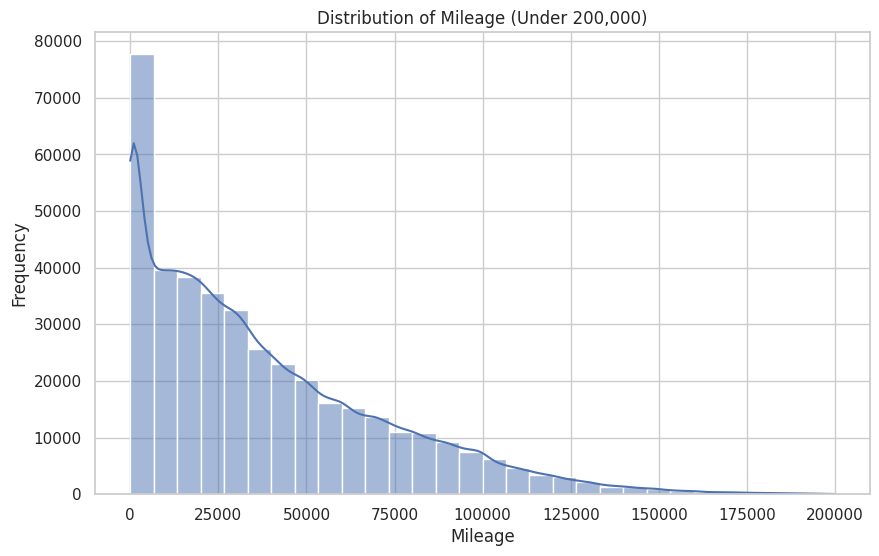

In [42]:
# Create a subset where Mileage is under 200,000
mileage_subset = df[df['mileage'] < 200000]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(mileage_subset['mileage'], bins=30, kde=True)

plt.title('Distribution of Mileage (Under 200,000)')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

sample_size = 1000
mileage_sample = mileage_subset.sample(n=sample_size, random_state=42)

#### `Standard Colour sample`

In [43]:
standard_colour = df['standard_colour']
sc_sample=standard_colour.sample(n=1000, random_state=42)

#### `Fuel Type sample`

In [44]:
fuel_type = df['fuel_type']
ft_sample=fuel_type.sample(n=1000, random_state=42)

#### `Vehicle_condition sampling`

In [45]:
vehicle_condition = df['vehicle_condition']
vc_sample=vehicle_condition.sample(n=1000, random_state=42)

#### `price_subset`:
 There are exrtreme outleirs in the price distribution so we need to create te subset of price by applying the condition.


1.   As we can see that the distribution graph of price is showing straight line which is showing our price is only distributed around 0 to 0.1 e7  
2.   we are going to create a subset of the price by applying the condition that it is noise or wrong value as the maximum price is 9999999.
3.  The IQR method is used to deal outliers and create a subset of price


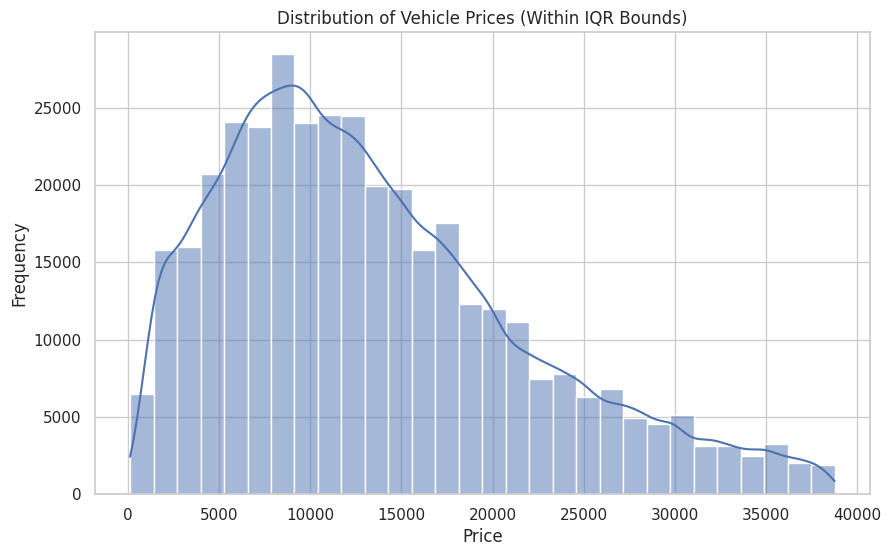

In [46]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

price_subset = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(price_subset['price'], bins=30, kde=True)

# Add titles and labels
plt.title('Distribution of Vehicle Prices (Within IQR Bounds)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

sample_size = 1000
price_sample = price_subset.sample(n=sample_size, random_state=42)

#### `Year of Registration subset`:
 mostly the cars lies between the 1980 to 2021 and most of them in the zone of 2000 to 2021.

In [47]:
year_of_registration_subset = df[(df['year_of_registration'] >= 1990) & (df['year_of_registration'] <= 2021)]

sample_size = 1000
yor_sample = year_of_registration_subset.sample(n=sample_size, random_state=42)

#### `Age_of_car Subset`

In [48]:
age_of_car= df['age_of_car']
aoc_sample=age_of_car.sample(n=1000, random_state=42)

#### `mileage_category sample`

In [49]:
mileage_category= df['Mileage_Category']
mc_sample=mileage_category.sample(n=1000, random_state=42)

#### `Displaying the distribution of the subset of year of registration`

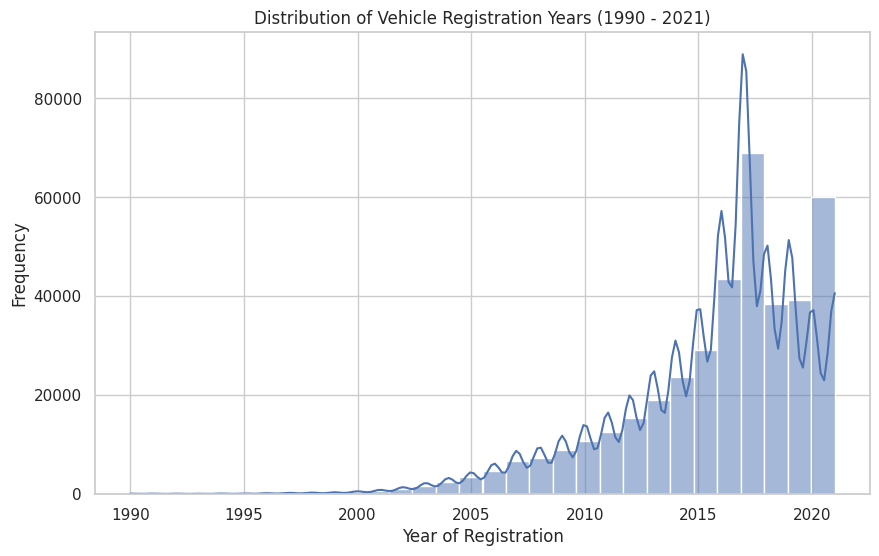

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(year_of_registration_subset['year_of_registration'], bins=30, kde=True)
plt.title('Distribution of Vehicle Registration Years (1990 - 2021)')
plt.xlabel('Year of Registration')
plt.ylabel('Frequency')
plt.show()

#### `Standard_make_subset`
1. Only counting the 30 frequent models of the cars for the visualization purpose.

In [51]:
make_counts = df['standard_make'].value_counts()
top_n_makers = make_counts.nlargest(30).index.tolist()  # Get top 30 makes

standard_make_subset = df[df['standard_make'].isin(top_n_makers)]
sample_size = 1000
smake_sample = standard_make_subset.sample(n=sample_size, random_state=42)

#### `Displaying the distribution of the subset`

<ipython-input-52-ac33cf7e3a56>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='standard_make', data=standard_make_subset, palette='viridis')


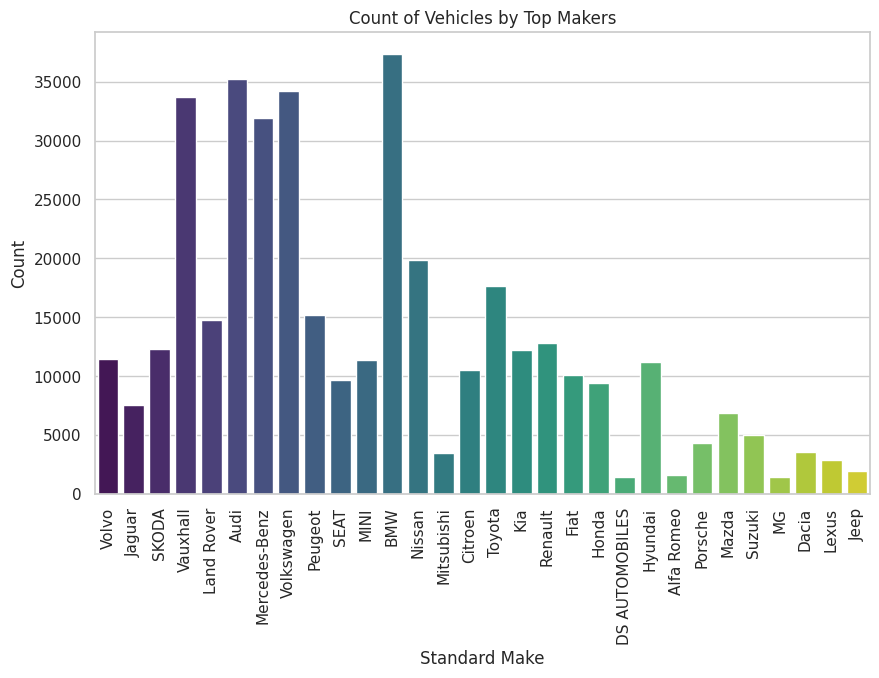

In [52]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='standard_make', data=standard_make_subset, palette='viridis')

plt.title('Count of Vehicles by Top Makers')
plt.xlabel('Standard Make')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### `Converting data type to categorical data type`

In [53]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 401684 entries, 0 to 402004
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   public_reference       401684 non-null  int64   
 1   mileage                401569 non-null  float64 
 2   reg_code               401638 non-null  category
 3   standard_colour        401684 non-null  category
 4   standard_make          401684 non-null  category
 5   standard_model         401684 non-null  category
 6   vehicle_condition      401684 non-null  category
 7   year_of_registration   401680 non-null  float64 
 8   price                  401684 non-null  int64   
 9   body_type              400906 non-null  category
 10  crossover_car_and_van  401684 non-null  bool    
 11  fuel_type              401091 non-null  category
 12  Mileage_Category       401684 non-null  category
 13  age_of_car             401680 non-null  float64 
dtypes: bool(1), category(8), 

**Advance Machine Learning Assignment Code**

In [54]:
df.isnull().sum()

,0
public_reference,0
mileage,115
reg_code,46
standard_colour,0
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,4
price,0
body_type,778


As all values are less than one percent er can remove these missing value for the model to perform better


In [55]:
df_cleaned= df.dropna()

In [56]:
df_cleaned = df_cleaned.drop(columns=['public_reference'])

### `Creating Sample_df using Stratified sampling technique`

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

RANDOM_STATE = 42
SAMPLE_SIZE = 10000

def stratified_sample(df, stratify_col, n_samples, random_state=RANDOM_STATE):
    """Perform stratified sampling on df based on stratify_col to get n_samples rows."""
    df = df.dropna(subset=[stratify_col]).copy()
    if n_samples >= len(df):
        return df.copy()

    # Check if any stratum has only 1 member
    strata_counts = df[stratify_col].value_counts()
    if strata_counts.min() < 2:
        # Remove strata with only 1 member
        valid_strata = strata_counts[strata_counts >= 2].index
        df = df[df[stratify_col].isin(valid_strata)]

    splitter = StratifiedShuffleSplit(n_splits=1, train_size=n_samples, random_state=random_state)
    for train_idx, _ in splitter.split(df, df[stratify_col]):
        return df.iloc[train_idx]

# 1. Prepare all stratification criteria
df_strat = df_cleaned.copy()

# Handle categorical data and create make groups
df_strat['standard_make'] = df_strat['standard_make'].astype(str)
make_counts = df_strat['standard_make'].value_counts()
common_makes = make_counts[make_counts >= 100].index
df_strat['make_group'] = np.where(
    df_strat['standard_make'].isin(common_makes),
    df_strat['standard_make'],
    'Other'
)

# Apply all filters
df_strat = df_strat[
    (df_strat['year_of_registration'].between(1990, 2021)) &
    (df_strat['mileage'] < 200000)
]

# Calculate IQR bounds for price
Q1, Q3 = df_strat['price'].quantile([0.25, 0.75])
IQR = Q3 - Q1
price_lower = max(Q1 - 1.5 * IQR, df_strat['price'].min())
price_upper = min(Q3 + 1.5 * IQR, df_strat['price'].max())
df_strat = df_strat[df_strat['price'].between(price_lower, price_upper)]

# 2. Create composite stratification key with proper binning
# Fix for the bin labels error
year_bins = list(range(1990, 2031, 10))  # 1990-2000, 2000-2010, 2010-2020, 2020-2030
year_labels = [f"{b}-{b+9}" for b in range(1990, 2021, 10)]
df_strat['yor_bin'] = pd.cut(
    df_strat['year_of_registration'],
    bins=year_bins,
    labels=year_labels,
    right=False
)

# Use fewer bins for price and mileage
df_strat['price_bin'] = pd.qcut(df_strat['price'], q=4, duplicates='drop')
df_strat['mileage_bin'] = pd.qcut(df_strat['mileage'], q=4, duplicates='drop')

df_strat['composite_strata'] = (
    df_strat['make_group'] + "_" +
    df_strat['yor_bin'].astype(str) + "_" +
    df_strat['price_bin'].astype(str) + "_" +
    df_strat['mileage_bin'].astype(str)
)

# 3. Take final stratified sample with fallback options
try:
    sample_df = stratified_sample(df_strat, 'composite_strata', SAMPLE_SIZE)
except ValueError as e:
    print("First fallback: Reducing to make_year stratification")
    df_strat['fallback_strata'] = df_strat['make_group'] + "_" + df_strat['yor_bin'].astype(str)
    try:
        sample_df = stratified_sample(df_strat, 'fallback_strata', SAMPLE_SIZE)
    except ValueError:
        print("Final fallback: Simple random sampling")
        sample_df = df_strat.sample(n=min(SAMPLE_SIZE, len(df_strat)), random_state=RANDOM_STATE)

# 4. Clean up and ensure proper sample size
sample_df = sample_df.drop(
    columns=['yor_bin', 'price_bin', 'mileage_bin', 'composite_strata', 'make_group', 'fallback_strata'],
    errors='ignore'
).reset_index(drop=True)

# Final check
if len(sample_df) < SAMPLE_SIZE:
    print(f"Warning: Only got {len(sample_df)} samples after stratification")
elif len(sample_df) > SAMPLE_SIZE:
    sample_df = sample_df.sample(n=SAMPLE_SIZE, random_state=RANDOM_STATE)

print(f"Final sample shape: {sample_df.shape}")

Final sample shape: (10000, 13)


In [58]:
sample_df.columns

Index(['mileage', 'reg_code', 'standard_colour', 'standard_make',
       'standard_model', 'vehicle_condition', 'year_of_registration', 'price',
       'body_type', 'crossover_car_and_van', 'fuel_type', 'Mileage_Category',
       'age_of_car'],
      dtype='object')

#**1️⃣Part I (50%)**

## **1.2: 🧩Automated Feature Selection**

#### `Importing Librarires and packages`

In [59]:
import sklearn
sklearn.set_config(transform_output="pandas")

%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) }, style='ticks', color_codes=True, font_scale=0.8
)

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import shap
shap.initjs()

#### 🔥Heat Map Correlation

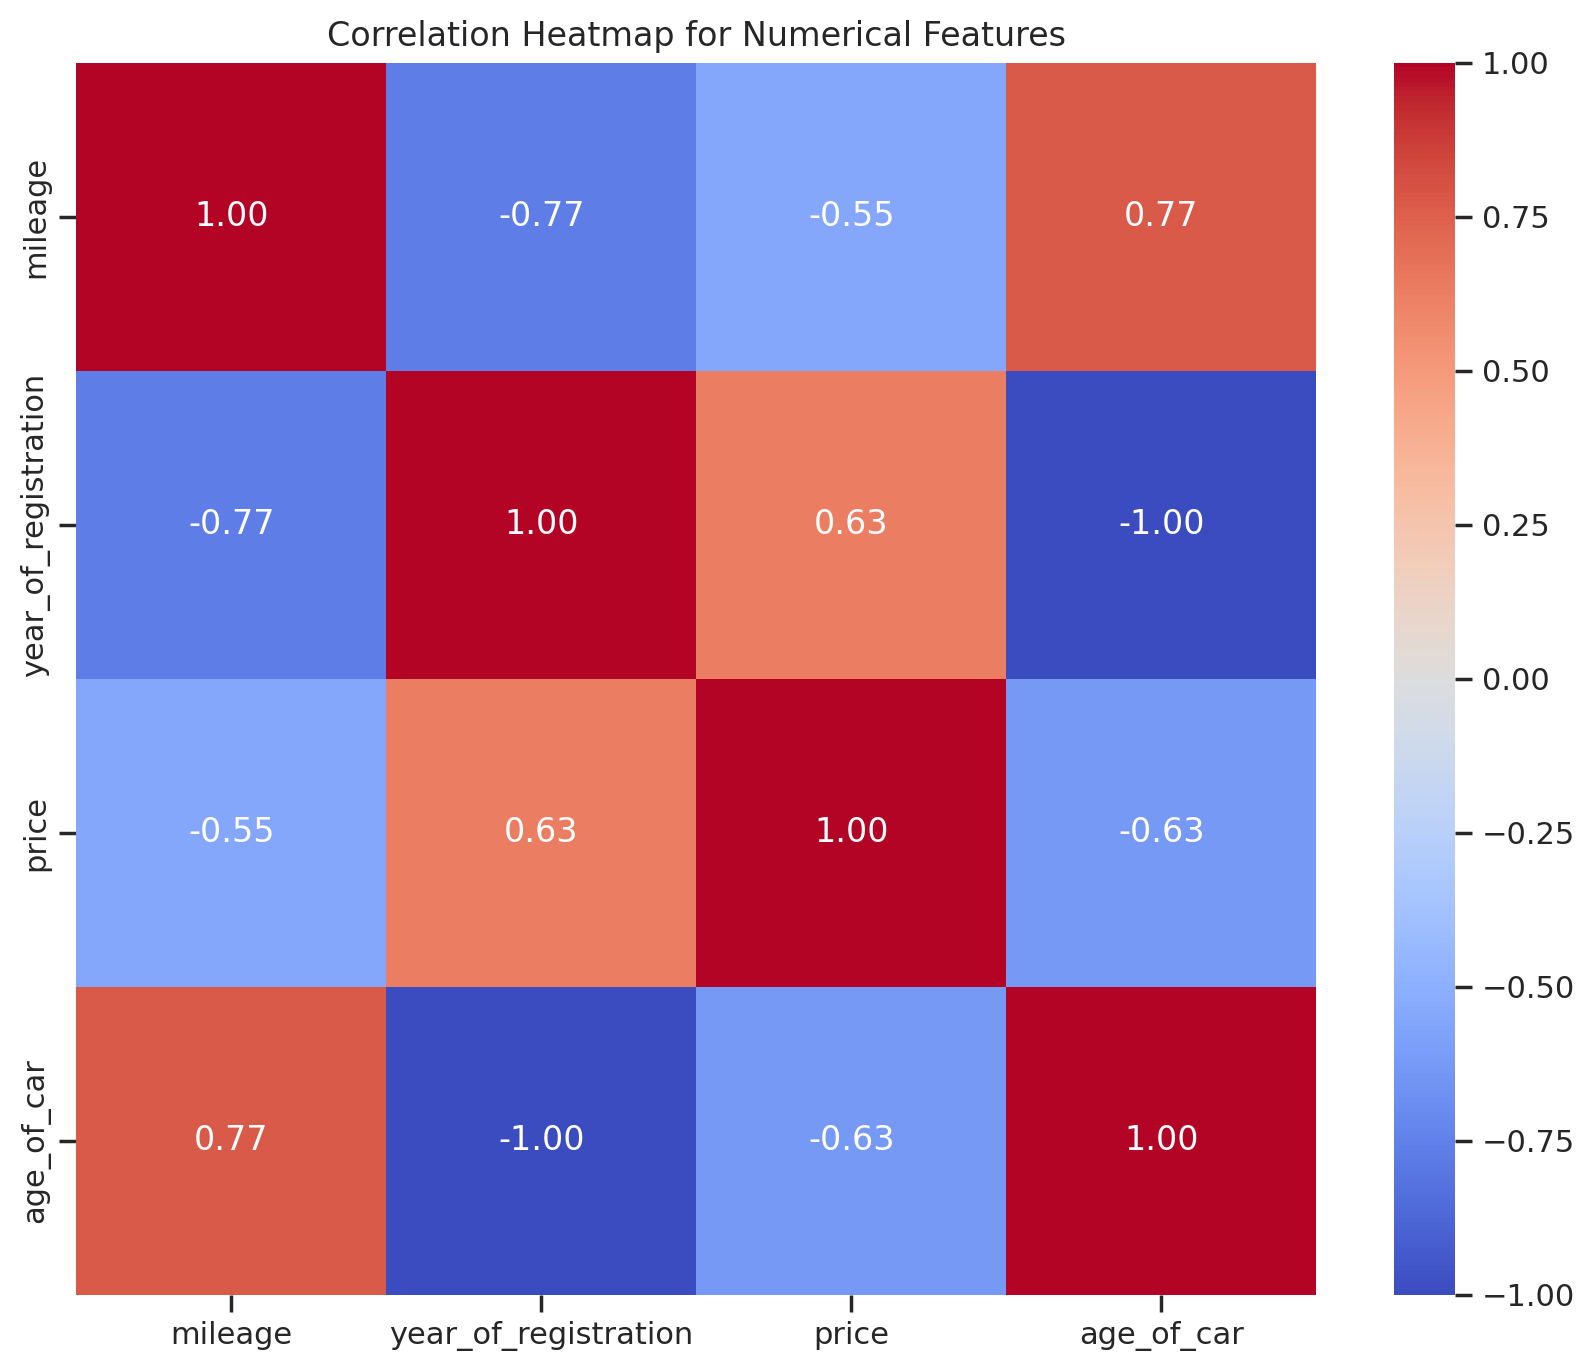

In [60]:

numerical_features = sample_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

#### ❤️Relationship between the fuel type and price

In [61]:
from scipy.stats import f_oneway

groups = [sample_df[sample_df['fuel_type'] == category]['price'] for category in sample_df['fuel_type'].unique()]

anova_result = f_oneway(*groups)
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"ANOVA p-value: {anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("There is a statistically significant relationship between the fuel type and price.")
else:
    print("No significant relationship found between the fuel type and price.")

ANOVA F-statistic: 106.77821244225528
ANOVA p-value: 2.05359377263403e-151
There is a statistically significant relationship between the fuel type and price.


####  👫Relationship between the vehicle_condition and price.

In [62]:
from scipy.stats import f_oneway

groups = [sample_df[sample_df['vehicle_condition'] == category]['price'] for category in sample_df['vehicle_condition'].unique()]

anova_result = f_oneway(*groups)
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"ANOVA p-value: {anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("There is a statistically significant relationship between the vehicle_condition and price.")
else:
    print("No significant relationship found between the vehicle and price.")

ANOVA F-statistic: 1020.6602872336232
ANOVA p-value: 2.4103571383734878e-213
There is a statistically significant relationship between the vehicle_condition and price.


### 1.2(a).🔄 *Automated* Feature Selection (AFS): Univariate

In [63]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.5 MB/s eta 0:00:00


In [64]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from category_encoders import TargetEncoder

# Define features and target
features = [
    'mileage', 'reg_code', 'standard_colour', 'standard_make',
    'standard_model', 'vehicle_condition', 'year_of_registration',
    'body_type', 'crossover_car_and_van', 'fuel_type',
    'Mileage_Category', 'age_of_car'
]
target = 'price'

X = sample_df[features]
y = sample_df[target]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply Target Encoding
encoder = TargetEncoder(cols=categorical_cols)
X_encoded = encoder.fit_transform(X, y)

# Apply SelectKBest to get top features
k = 4
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X_encoded, y)

# Get names of selected features
selected_feature_mask = selector.get_support()
selected_feature_names = X_encoded.columns[selected_feature_mask]

print("Top selected features:", selected_feature_names.tolist())


Top selected features: ['reg_code', 'standard_model', 'year_of_registration', 'age_of_car']


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Model using all features
all_model = RandomForestRegressor(random_state=42)
all_scores = cross_val_score(all_model, X_encoded, y, cv=5)
print(f"Model with ALL features — Mean: {all_scores.mean():.4f}, Std: {all_scores.std():.4f}")

# Model using selected features
selected_X = X_encoded[selected_feature_names]
selected_model = RandomForestRegressor(random_state=42)
selected_scores = cross_val_score(selected_model, selected_X, y, cv=5)
print(f"Model with SELECTED features — Mean: {selected_scores.mean():.4f}, Std: {selected_scores.std():.4f}")


Model with ALL features — Mean: 0.8801, Std: 0.0064
Model with SELECTED features — Mean: 0.8480, Std: 0.0049


### 1.2(b). ♾️Recursive Feature Elimination (RFE)





In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt

model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe_selector = RFECV(
    estimator=model,
    step=1,
    cv=5,
    scoring='neg_mean_squared_error',  # Changed from 'r2'
    min_features_to_select=5,          # Ensures at least 5 features are kept
    n_jobs=-1,
    verbose=1
)
rfe_selector.fit(X_encoded, y)

# Get selected features
selected_features = X_encoded.columns[rfe_selector.support_]
print("Selected features by RFECV:", selected_features.tolist())

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Selected features by RFECV: ['mileage', 'reg_code', 'standard_colour', 'standard_make', 'standard_model', 'year_of_registration', 'body_type', 'crossover_car_and_van', 'fuel_type', 'age_of_car']


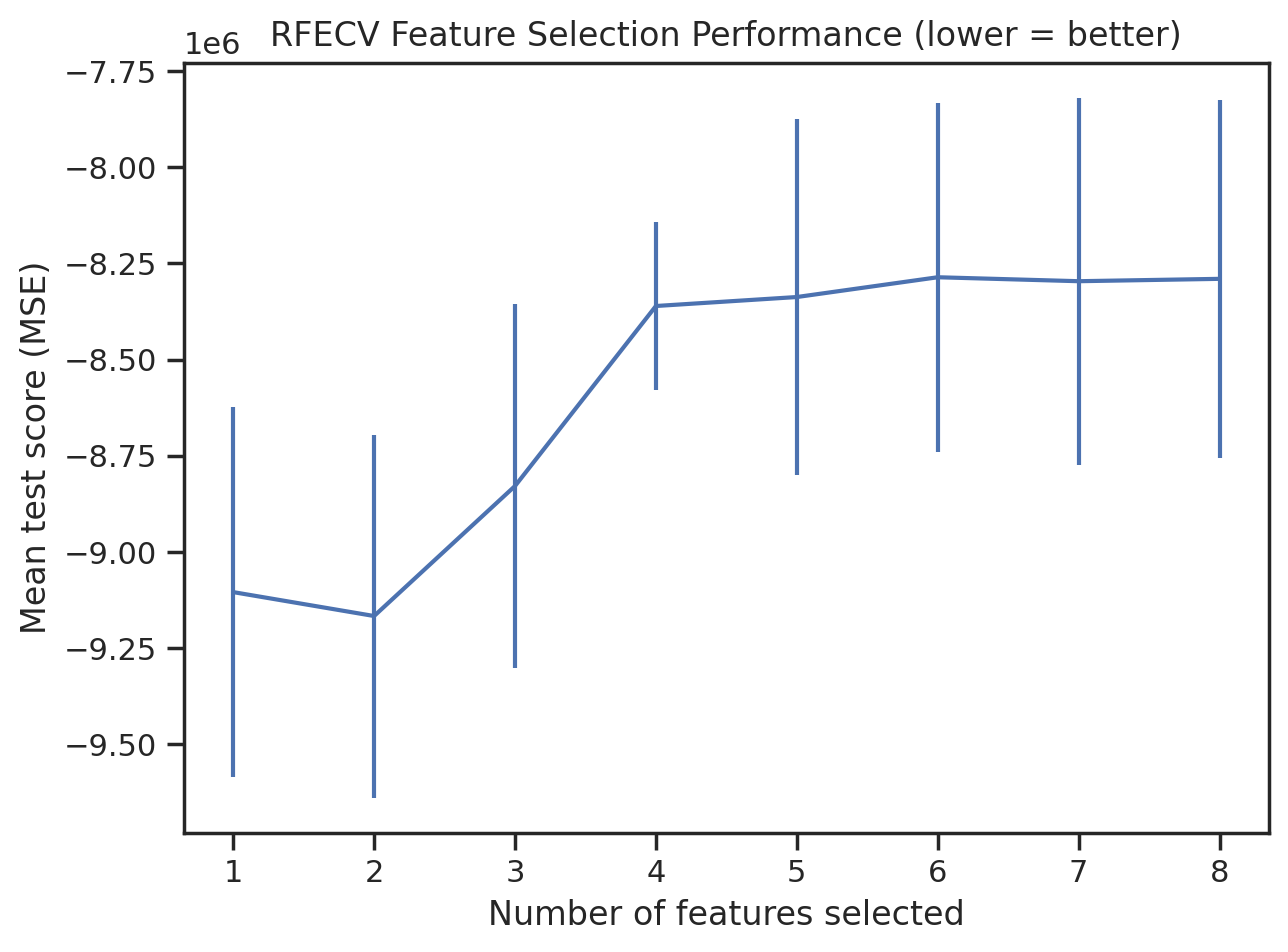

Model with ALL features — Mean R²: 0.8801, Std: 0.0064
Model with SELECTED features — Mean R²: 0.8802, Std: 0.0063


In [67]:
from sklearn.model_selection import cross_val_score

# Plot number of features vs. cross-validation scores
n_scores = len(rfe_selector.cv_results_["mean_test_score"])
fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores + 1),
    rfe_selector.cv_results_["mean_test_score"],
    yerr=rfe_selector.cv_results_["std_test_score"]
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score (MSE)")
ax.set_title("RFECV Feature Selection Performance (lower = better)")
plt.show()

# Compare model performance: All features vs. Selected features
model_all = RandomForestRegressor(n_estimators=100, random_state=42)
score_all = cross_val_score(model_all, X_encoded, y, cv=5, scoring='r2')
print(f"Model with ALL features — Mean R²: {score_all.mean():.4f}, Std: {score_all.std():.4f}")

X_selected = X_encoded[selected_features]
model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
score_selected = cross_val_score(model_selected, X_selected, y, cv=5, scoring='r2')
print(f"Model with SELECTED features — Mean R²: {score_selected.mean():.4f}, Std: {score_selected.std():.4f}")


In [68]:
# Show feature ranking
print("Feature rankings (1 = selected):")
ranked_features = pd.Series(rfe_selector.ranking_, index=X_encoded.columns)
print(ranked_features.sort_values())

# Full ranking from best to worst
print("\nFeatures ranked from Most to Least important:")
print(rfe_selector.feature_names_in_[(np.argsort(rfe_selector.ranking_))])


Feature rankings (1 = selected):
mileage                  1
reg_code                 1
standard_colour          1
standard_make            1
standard_model           1
year_of_registration     1
body_type                1
crossover_car_and_van    1
age_of_car               1
fuel_type                1
Mileage_Category         2
vehicle_condition        3
dtype: int64

Features ranked from Most to Least important:
['mileage' 'reg_code' 'standard_colour' 'standard_make' 'standard_model'
 'year_of_registration' 'body_type' 'crossover_car_and_van' 'age_of_car'
 'fuel_type' 'Mileage_Category' 'vehicle_condition']


###` 1.2(c). 🔍 Sequential Feature Selection (SFS) (Forward/Backward)

In [69]:
from sklearn.feature_selection import SequentialFeatureSelector
 #Initialize model
model = LinearRegression()
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# 1. Pure Sequential Feature Selection
print("Running Sequential Feature Selection...")
sfs = SequentialFeatureSelector(
    estimator=model,
    n_features_to_select='auto',  # Let SFS determine optimal features
    direction="forward",
    scoring="r2",
    cv=3,                        # Reduced folds for speed
    n_jobs=-1,
    tol=0.01                     # Early stopping
)
sfs.fit(X_encoded, y)

# Get selected features
selected_features = X_encoded.columns[sfs.get_support()]
num_selected = len(selected_features)
total_features = len(X_encoded.columns)
print(f"\nSFS selected {num_selected}/{total_features} features:", selected_features.tolist())

Running Sequential Feature Selection...

SFS selected 4/12 features: ['mileage', 'reg_code', 'standard_make', 'standard_model']



Evaluating performance...
All 12 features — R²: 0.7720 ± 0.0066
SFS 4 features — R²: 0.7596 ± 0.0084

Generating SFS performance curve...


Feature subsets: 100%|██████████| 11/11 [00:14<00:00,  1.32s/it]


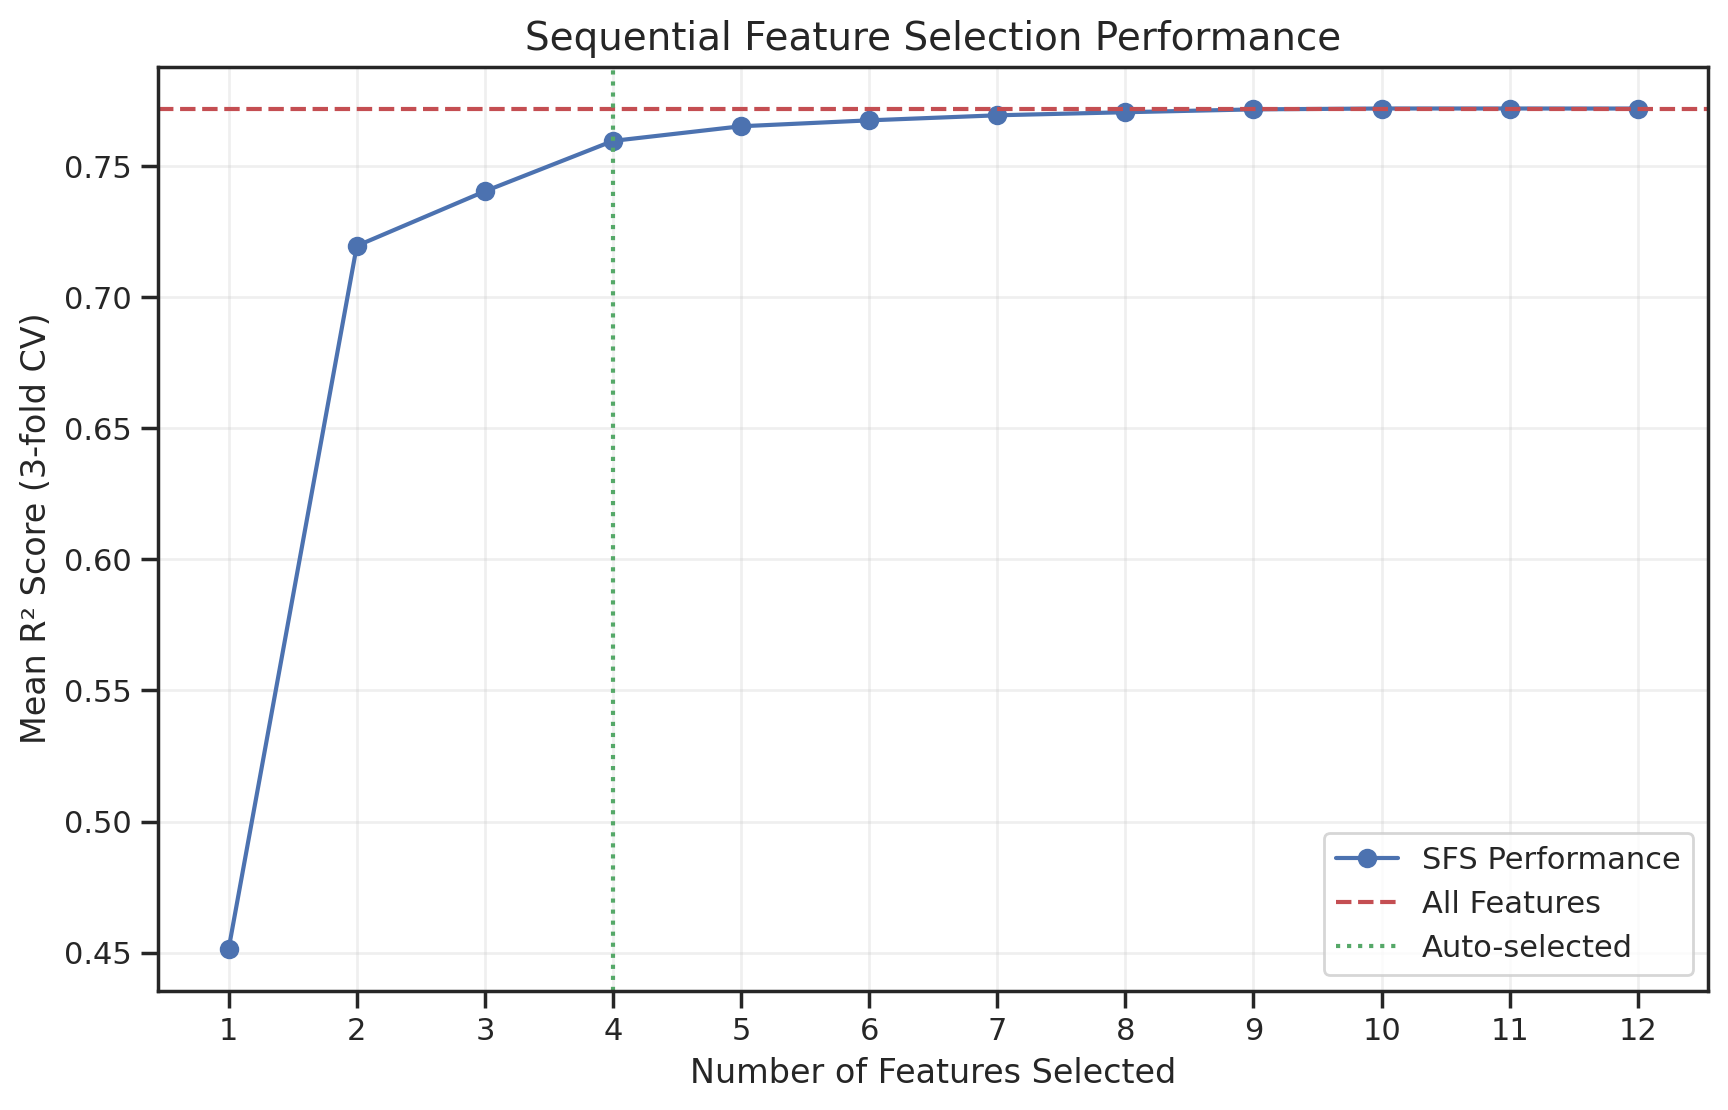

In [70]:
from tqdm import tqdm
# 2. Performance Evaluation
print("\nEvaluating performance...")
# All features baseline
score_all = cross_val_score(model, X_encoded, y, cv=3, scoring='r2')
print(f"All {total_features} features — R²: {score_all.mean():.4f} ± {score_all.std():.4f}")

# SFS-selected features
score_sel = cross_val_score(model, X_encoded[selected_features], y, cv=3, scoring='r2')
print(f"SFS {num_selected} features — R²: {score_sel.mean():.4f} ± {score_sel.std():.4f}")

# 3. Performance Curve (with error prevention)
print("\nGenerating SFS performance curve...")
max_features_to_test = min(15, total_features - 1)  # Ensure k < n_features
sfs_scores = []

for k in tqdm(range(1, max_features_to_test + 1), desc="Feature subsets"):
    sfs_k = SequentialFeatureSelector(
        estimator=model,
        n_features_to_select=k,
        direction='forward',
        cv=3,
        n_jobs=-1
    )
    sfs_k.fit(X_encoded, y)
    features_k = X_encoded.columns[sfs_k.get_support()]
    score_k = cross_val_score(model, X_encoded[features_k], y, cv=3, scoring='r2')
    sfs_scores.append(score_k.mean())

# Add the full feature set result separately
sfs_scores.append(score_all.mean())
feature_counts = list(range(1, max_features_to_test + 1)) + [total_features]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, sfs_scores, 'b-o', label='SFS Performance')
plt.axhline(y=score_all.mean(), color='r', linestyle='--', label='All Features')
if num_selected <= max_features_to_test:
    plt.axvline(x=num_selected, color='g', linestyle=':', label='Auto-selected')

plt.xlabel("Number of Features Selected", fontsize=12)
plt.ylabel("Mean R² Score (3-fold CV)", fontsize=12)
plt.title("Sequential Feature Selection Performance", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(feature_counts)
plt.show()

## 🌲1.3: Tree Ensembles

###  🎲 1.3(a). Random Forest Regressor

##### 📌Note: This should be noted that random forest regressor is the tree ensembling begging technique

In [71]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import category_encoders as ce  # Target Encoder


In [72]:
selected_features = ['mileage', 'reg_code' ,'standard_colour' ,'standard_make', 'standard_model',
 'year_of_registration', 'body_type', 'crossover_car_and_van', 'age_of_car',
 'fuel_type' ,'Mileage_Category' ]
y = sample_df['price']
X_selected = X[selected_features]

cat_cols = X_selected.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply target encoding
encoder = ce.TargetEncoder(cols=cat_cols)
X_encoded = encoder.fit_transform(X_selected, y)
X_selected = X_encoded[selected_features]
# ----------------------------------------
# Train-Test Split
# ----------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# ----------------------------------------
# Evaluation Function
# ----------------------------------------

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

def print_metrics(name, y_train, y_train_pred, y_test, y_test_pred):
    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    print(f"\n{name}")
    print("Model performance for Training set")
    print(f"- Root Mean Squared Error: {train_rmse:.4f}")
    print(f"- Mean Absolute Error: {train_mae:.4f}")
    print(f"- R2 Score: {train_r2:.4f}")
    print("----------------------------------")
    print("Model performance for Test set")
    print(f"- Root Mean Squared Error: {test_rmse:.4f}")
    print(f"- Mean Absolute Error: {test_mae:.4f}")
    print(f"- R2 Score: {test_r2:.4f}")
    print("===================================")


In [73]:
# ----------------------------------------
# Initial Model Training (Default)
# ----------------------------------------

initial_rf = RandomForestRegressor(random_state=42)
initial_rf.fit(X_train, y_train)

# Predictions
train_pred_init = initial_rf.predict(X_train)
test_pred_init = initial_rf.predict(X_test)

# Evaluation
print_metrics("Random Forest Regressor (Initial)", y_train, train_pred_init, y_test, test_pred_init)



Random Forest Regressor (Initial)
Model performance for Training set
- Root Mean Squared Error: 1078.7839
- Mean Absolute Error: 720.5428
- R2 Score: 0.9832
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2977.1049
- Mean Absolute Error: 1981.2757
- R2 Score: 0.8716


In [74]:
# ----------------------------------------
#  Hyperparameter Tuning
# ----------------------------------------

rf_params = {
    # "max_depth": [5, 8, 15, None, 10],
    # "max_features": [5, 7, 8, 'sqrt', 'log2'],
    # "min_samples_split": [2, 8, 15, 20],
    # "n_estimators": [100, 200, 500, 1000]

    "max_depth": [5, 10, None],
    "max_features": ['sqrt', 'log2'],
    "min_samples_split": [2, 10],
    "n_estimators": [50, 100]
    }

random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=rf_params,
    n_iter=30,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random.fit(X_train, y_train)

print("\n---------------- Best Params After Tuning ----------------")
print(random.best_params_)

# ----------------------------------------
# Retrain Model with Best Params
# ----------------------------------------

tuned_rf = RandomForestRegressor(**random.best_params_, random_state=42)
tuned_rf.fit(X_train, y_train)

# Predictions
train_pred_tuned = tuned_rf.predict(X_train)
test_pred_tuned = tuned_rf.predict(X_test)

# Evaluation
print_metrics("Random Forest Regressor (After Tuning)", y_train, train_pred_tuned, y_test, test_pred_tuned)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 24 is smaller than n_iter=30. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



---------------- Best Params After Tuning ----------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': None}

Random Forest Regressor (After Tuning)
Model performance for Training set
- Root Mean Squared Error: 1127.1381
- Mean Absolute Error: 757.5320
- R2 Score: 0.9816
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3111.1197
- Mean Absolute Error: 2075.9221
- R2 Score: 0.8598


### 🚀1.3b: Adaboost Algorithm

##### 📌Note: the adaboost isthe boosting technique of tree ensembling


In [75]:
from sklearn.ensemble import AdaBoostRegressor

initial_ada = AdaBoostRegressor(random_state=42)
initial_ada.fit(X_train, y_train)

# Predictions
train_pred_init = initial_ada.predict(X_train)
test_pred_init = initial_ada.predict(X_test)

# Evaluation
print_metrics("AdaBoost Regressor (Initial)", y_train, train_pred_init, y_test, test_pred_init)




AdaBoost Regressor (Initial)
Model performance for Training set
- Root Mean Squared Error: 5185.1039
- Mean Absolute Error: 4480.3151
- R2 Score: 0.6115
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5345.0170
- Mean Absolute Error: 4615.5409
- R2 Score: 0.5862


In [ ]:
# ----------------------------------------
#   Hyperparameter Tuning
# ----------------------------------------

ada_params = {
    "n_estimators": [50, 100],
    "learning_rate": [0.05, 0.1, 0.5],
    "loss": ['linear', 'square'],
    "estimator": [DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=5)]
    # "n_estimators": [50, 100, 200, 300],
    # "learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0],
    # "loss": ['linear', 'square', 'exponential'],
    # "estimator": [DecisionTreeRegressor(max_depth=d) for d in [3, 5, 8]]
}

random = RandomizedSearchCV(
    estimator=AdaBoostRegressor(random_state=42),
    param_distributions=ada_params,
    n_iter=30,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random.fit(X_train, y_train)

print("\n---------------- Best Params After Tuning ----------------")
print(random.best_params_)

# ----------------------------------------
#  Retrain Model with Best Params
# ----------------------------------------

tuned_ada = AdaBoostRegressor(**random.best_params_, random_state=42)
tuned_ada.fit(X_train, y_train)

# Predictions
train_pred_tuned = tuned_ada.predict(X_train)
test_pred_tuned = tuned_ada.predict(X_test)

# Evaluation
print_metrics("AdaBoost Regressor (After Tuning)", y_train, train_pred_tuned, y_test, test_pred_tuned)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 24 is smaller than n_iter=30. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


### 📈 1.3c:Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
initial_gb = GradientBoostingRegressor(random_state=42)
initial_gb.fit(X_train, y_train)

# Predictions
train_pred_init = initial_gb.predict(X_train)
test_pred_init = initial_gb.predict(X_test)

# Evaluation
print_metrics("Gradient Boosting Regressor (Initial)", y_train, train_pred_init, y_test, test_pred_init)



In [ ]:
# ----------------------------------------
#   Hyperparameter Tuning
# ----------------------------------------

gb_params = {
#     "n_estimators": [100, 200, 300, 500],
#     "learning_rate": [0.01, 0.05, 0.1, 0.2],
#     "max_depth": [3, 5, 7, 10],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
#     "subsample": [0.6, 0.8, 1.0],
#     "max_features": ['sqrt', 'log2', None]
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
    "subsample": [0.8, 1.0],
    "max_features": ['sqrt', 'log2']
              }

random = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=gb_params,
    n_iter=50,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random.fit(X_train, y_train)

print("\n---------------- Best Params After Tuning ----------------")
print(random.best_params_)

# ----------------------------------------
#    Retrain Model with Best Params
# ----------------------------------------

tuned_gb = GradientBoostingRegressor(**random.best_params_, random_state=42)
tuned_gb.fit(X_train, y_train)

# Predictions
train_pred_tuned = tuned_gb.predict(X_train)
test_pred_tuned = tuned_gb.predict(X_test)

# Evaluation
print_metrics("Gradient Boosting Regressor (After Tuning)", y_train, train_pred_tuned, y_test, test_pred_tuned)

#### Part 1 3(d). Xgboost Regressor

In [ ]:
from xgboost import XGBRegressor

# ----------------------------------------
# Initial Model Training (Default)
# ----------------------------------------

initial_xgb = XGBRegressor(random_state=42)
initial_xgb.fit(X_train, y_train)

# Predictions
train_pred_init = initial_xgb.predict(X_train)
test_pred_init = initial_xgb.predict(X_test)

# Evaluation
print_metrics("XGBoost Regressor (Initial)", y_train, train_pred_init, y_test, test_pred_init)


In [ ]:
# ----------------------------------------
# Hyperparameter Tuning
# ----------------------------------------

xgb_params = {
    "n_estimators": [100, 200],  # Number of boosting rounds
    "learning_rate": [0.01, 0.05, 0.1],  # Learning rate for each boosting step
    "max_depth": [3, 5, 7],  # Maximum depth of individual trees
    "min_child_weight": [1, 3, 5],  # Minimum sum of instance weight (hessian) in a child
    "subsample": [0.8, 1.0],  # Subsample ratio of the training instances
    "colsample_bytree": [0.6, 0.8, 1.0],  # Subsample ratio of columns for each tree
    "gamma": [0, 0.1, 0.3, 0.5],  # Minimum loss reduction required to make a further partition
}

random = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=xgb_params,
    n_iter=50,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random.fit(X_train, y_train)

print("\n---------------- Best Params After Tuning ----------------")
print(random.best_params_)

# ----------------------------------------
# Retrain Model with Best Params
# ----------------------------------------

tuned_xgb = XGBRegressor(**random.best_params_, random_state=42)
tuned_xgb.fit(X_train, y_train)

# Predictions
train_pred_tuned = tuned_xgb.predict(X_train)
test_pred_tuned = tuned_xgb.predict(X_test)

# Evaluation
print_metrics("XGBoost Regressor (After Tuning)", y_train, train_pred_tuned, y_test, test_pred_tuned)

### ⚡ 1.3(d): Ensemble of tree ensembles.

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="X has feature names")


# Random Forest
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, subsample=0.8, random_state=42)
gb.fit(X_train, y_train)

# XGBoost
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb.fit(X_train, y_train)


In [ ]:
# Use Ridge Regression as final estimator (meta-model)
from sklearn.ensemble import GradientBoostingRegressor

meta_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)

stack_model = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('xgb', xgb)
    ],
    # final_estimator=Ridge(alpha=1.0),
    final_estimator=meta_model ,
    passthrough=True,  # Use original features along with predictions
    n_jobs=-1
)

# Train the ensemble
stack_model.fit(X_train, y_train)

# Predictions
train_pred_stack = stack_model.predict(X_train)
test_pred_stack = stack_model.predict(X_test)

# Evaluation
print_metrics("Stacked Regressor Ensemble", y_train, train_pred_stack, y_test, test_pred_stack)


## 4: Feature Importance

In [ ]:
model = xgb
model.fit(X_train, y_train)


#### Permutation Importance (via sklearn)

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Compute permutation importance on the test set
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Sort and plot
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_test.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance via Permutation")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(
    model, X_test, y_test, n_repeats=30, random_state=0, scoring='r2'
)

# Create dataframe with importance results
perm_importance_df = pd.DataFrame(
    dict(
        feature=X_test.columns,
        pi_mean=perm_importance['importances_mean'],
        pi_std=perm_importance['importances_std']
    )
)

# Sorting by permutation importance mean (ascending for plotting)
perm_importance_df_sorted = perm_importance_df.sort_values(by='pi_mean', ascending=True)

# Visualisation with error bars
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(
    perm_importance_df_sorted['pi_mean'],
    perm_importance_df_sorted['feature'],
    xerr=perm_importance_df_sorted['pi_std'],
    fmt='o', color='black',
    ecolor='darkred', elinewidth=3, capsize=5, alpha=0.8
)

ax.set_ylabel('Feature')
ax.set_xlabel('Permutation Importance Mean')
plt.title('Feature Importance with Error Bars')
plt.tight_layout()
plt.show()

#### SHAP Feature Importance

In [ ]:
import shap

# Check dtypes
print(X_train.dtypes)

# Optional: if you suspect object/string columns, convert them
X_train_numeric = X_train.astype('float64')
X_test_numeric = X_test.astype('float64')

# Use with SHAP
explainer = shap.Explainer(model, X_train_numeric)
shap_values = explainer(X_test_numeric)

# Summary plot
shap.summary_plot(shap_values, X_test_numeric, plot_type="bar")


In [ ]:
explainer = shap.Explainer(model, X_train_numeric)

# Calculate SHAP values
shap_values = explainer(X_test_numeric)

# Get the top features based on average absolute SHAP values
shap_df = pd.DataFrame(shap_values.values, columns=X_train.columns)
top_features = shap_df.abs().mean().sort_values(ascending=False).index[:2]  # Top 2 features


In [ ]:

sample_idx = 0  # Adjust as needed

# Set a larger figure size BEFORE calling the SHAP plot
plt.figure(figsize=(18, 6))  # Wider and taller
shap.plots.waterfall(shap_values[sample_idx], max_display=8)  # Reduce to 8 features for clarity
plt.tight_layout()
plt.gcf().set_size_inches(10, 6)
plt.subplots_adjust(left=0.4)  # Increase left margin
plt.show()

In [ ]:
# Print actual vs predicted values for a specific sample
print(f"\nAnalyzing sample index {sample_idx}:")
print(f"Actual value: {y_test.iloc[sample_idx]:.2f}")
print(f"Predicted value: {model.predict(X_test.iloc[sample_idx:sample_idx+1])[0]:.2f}")

In [ ]:
# Interactive force plot
shap.initjs()
shap.plots.force(shap_values[sample_idx])

In [ ]:
shap_df = pd.DataFrame(shap_values.values, columns=X_train.columns)
top_features = shap_df.abs().mean().sort_values(ascending=False).index[:2]

for feat in top_features:
    shap.plots.scatter(shap_values[:, feat], color=shap_values)
pd.DataFrame({
    'features': X_train.columns,
    'shap_importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values('shap_importance', ascending=False).to_csv('xgboost_shap_importance.csv', index=False)


In [ ]:
shap.summary_plot(shap_values, X_test)


### SHAP/PDP Model Explanations

In [ ]:
import shap

# Ensure X is numeric
X_train_numeric = X_train.astype('float64')
X_test_numeric = X_test.astype('float64')

# Create a SHAP explainer (for tree-based models, use TreeExplainer)
explainer = shap.Explainer(model, X_train_numeric)
shap_values = explainer(X_test_numeric)

# Pick a feature name to explain
feature_to_plot = 'standard_model'

# SHAP dependence plot
shap.dependence_plot(feature_to_plot, shap_values.values, X_test_numeric)


In [ ]:
import shap

# Ensure X is numeric
X_train_numeric = X_train.astype('float64')
X_test_numeric = X_test.astype('float64')

# Create a SHAP explainer (for tree-based models, use TreeExplainer)
explainer = shap.Explainer(model, X_train_numeric)
shap_values = explainer(X_test_numeric)

# Pick a feature name to explain
feature_to_plot = 'standard_make'
# SHAP dependence plot
shap.dependence_plot(feature_to_plot, shap_values.values, X_test_numeric)


In [ ]:
import shap

# Ensure X is numeric
X_train_numeric = X_train.astype('float64')
X_test_numeric = X_test.astype('float64')

# Create a SHAP explainer (for tree-based models, use TreeExplainer)
explainer = shap.Explainer(model, X_train_numeric)
shap_values = explainer(X_test_numeric)

# Pick a feature name to explain
feature_to_plot = 'year_of_registration'
# SHAP dependence plot
shap.dependence_plot(feature_to_plot, shap_values.values, X_test_numeric)


In [ ]:
import shap

# Ensure X is numeric
X_train_numeric = X_train.astype('float64')
X_test_numeric = X_test.astype('float64')

# Create a SHAP explainer (for tree-based models, use TreeExplainer)
explainer = shap.Explainer(model, X_train_numeric)
shap_values = explainer(X_test_numeric)

# Pick a feature name to explain
feature_to_plot = 'mileage'
# SHAP dependence plot
shap.dependence_plot(feature_to_plot, shap_values.values, X_test_numeric)


### Partial Dependence Plots (PDP)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Choose your top important features
features_to_plot = ['standard_make', 'year_of_registration', 'standard_model', 'mileage']

# Set up subplots
n_features = len(features_to_plot)
fig, axs = plt.subplots(1, n_features, figsize=(5 * n_features, 4))

# If only 1 feature, wrap ax in list
if n_features == 1:
    axs = [axs]

# Plot PDP for each feature
for i, feature in enumerate(features_to_plot):
    PartialDependenceDisplay.from_estimator(
        estimator=model,  # Your trained model (e.g., xgb, rf, gb, etc.)
        X=X_test,
        features=[feature],
        ax=axs[i],
        kind="average"
    )
    axs[i].set_title(f"PDP for '{feature}'", fontsize=12)

plt.tight_layout()
plt.show()


# **1️⃣Part II (40%)**

### II.7. Dimensionality Reduction (Linear)

### II.7(a). PCA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# let us now check the mean and variance of the scaled data
print("Mean:", np.mean(X_scaled, axis=0))
print("Variance:", np.var(X_scaled, axis=0))

In [ ]:
#Applying the pca analysis
pca_full = PCA(n_components=None)
X_pca_full = pca_full.fit_transform(X_scaled)

In [ ]:
# get explained variance for each component
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [ ]:
# print explained variance
print("Explained variance for All components:")
for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"PC{i}: {ev:.3f} (Cumulative: {cv:.3f})")

#### Note:✅Key Insights
1. PC1 (38.2%):

  - The first principal component alone explains 38.2% of the variance in your data.
  
  - This is the most important direction in your data — the axis along which the data varies the most.\
2. PC1 + PC2 (58.8%):

  - Just the first 2 components capture nearly 59% of all variance.

  - This means you could likely visualize your data in 2D (PC1 vs PC2) and still retain a lot of structure.

3. PC1 to PC4 (76.6%):

  - With 4 components, you’re explaining over three-quarters (77%) of the data's variability.

  - That’s a strong signal that you could reduce your dataset to 4 dimensions instead of keeping all 11 original ones.

4. PC1 to PC6 (90.7%):

  - Using the first 6 components gives you over 90% of the original information.

  - This is a common threshold in practice for dimensionality reduction — preserving >90% is considered very good.



#### Scree Plot (variance visualization)
Time to find the "elbow"! This tells us how many components to keep.

In [ ]:
num_components = len(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, num_components + 1), explained_variance, alpha=0.7, label='Explained variance')
plt.plot(range(1, num_components + 1), cumulative_variance, 'ro-', label='Cumulative variance')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.title('Scree plot: where’s the elbow?')
plt.xticks(range(1, num_components + 1))
plt.legend()
plt.grid(True)
plt.show()

#### Note:✅Key Insights
1. The elbow point:
  
  - where the curve transitions from a steep drop to a gradual slope—is observed around PC2 or PC3, suggesting that these components account for the majority of the variance in the data. Beyond this point, each additional principal component contributes only a small increase in explained variance, indicating diminishing returns.

2. The cumulative variance
  - is implied to rise sharply with the first few components before leveling off. If the first 2–3 principal components explain a sufficient portion of the variance (e.g., 70–80%), retaining more may not be necessary. Components beyond the elbow (e.g., PC6–PC11) are likely associated with noise or minor variations and could be excluded to avoid overfitting.

#### Getting 4 Components for jsut visualization

In [ ]:
# Step 1: Apply PCA
pca_2 = PCA(n_components=2)
X_pca_2d = pca_2.fit_transform(X_scaled)

In [ ]:
X_pca_2d.columns = ['PC1', 'PC2']
df_pca = X_pca_2d.copy()
df_pca['Price'] = y.reset_index(drop=True)  # Ensure matching index


In [ ]:
df_pca = pd.DataFrame(X_pca_2d.values, columns=['PC1', 'PC2'])
df_pca['Price'] = y.reset_index(drop=True)


In [ ]:
# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Price', data=df_pca, palette='viridis')
plt.title('2D PCA Plot (58.8 % Variance Explained)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Price')
plt.tight_layout()
plt.show()


#### Key Insights:
1. Distinct Structure and Spread
The data points form clear, diagonal bands across the plot, suggesting some underlying structure or repeating patterns in the original variables. There is a noticeable spread along PC1, indicating that this component captures the largest differences between data points.
2. Price Distribution
The color gradient represents price, with darker colors for lower prices and lighter colors for higher prices. Most points are clustered in the lower price range (darker colors), while higher-priced points (lighter colors) are more sparsely distributed and scattered throughout the plot.

3. No Clear Price-Based Clusters
There are no obvious clusters or groupings based solely on price. Instead, higher prices appear sporadically across different regions of the PCA space, suggesting that price alone does not define distinct groups in the data.
4. Potential for Further Analysis
Since the plot reveals structure but not clear price-based separation, it may be useful to investigate other features or use more components to uncover additional patterns related to price or other variables

##### Code to Identify Important Features Based on PC1 and PC2

In [ ]:
# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

#### Feature Extraction from PC

In [ ]:
pca = PCA(n_components=6)
pca.fit(X_scaled)


loadings = pca.components_.T  # Transpose to have features as rows

loading_df = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(loadings.shape[1])],
    index=[f for f in X.columns[:loadings.shape[0]]]
)

# To find the top features for each PC
top_features_per_pc = {}

# Loop through each PC
for pc in range(loadings.shape[1]):
    pc_column = loading_df.iloc[:, pc]  # Extract the loadings for the current PC
    sorted_features = pc_column.abs().sort_values(ascending=False)  # Sort by absolute value
    top_features_per_pc[f'PC{pc+1}'] = sorted_features.head(6)  # Get top 6 features for this PC

# Display top features for each PC
for pc, features in top_features_per_pc.items():
    print(f"Top features for {pc}:")
    print(features)
    print()


In [ ]:
# Step 1: Apply PCA
pca_4 = PCA(n_components=4)
X_pca_4d = pca_4.fit_transform(X_scaled)
X_pca_4d.columns = ['PC1', 'PC2', 'PC3', 'PC4']

df_pca = X_pca_4d.copy()


df_pca = pd.DataFrame(X_pca_4d.values, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_pca['Price'] = y.reset_index(drop=True)  # Ensure matching index
df_pca_4d = pd.DataFrame(X_pca_4d.iloc[:, :2], columns=['PC1', 'PC2'])  # Just plot PC1 vs PC2
df_pca_4d['Price'] = y
sns.pairplot(df_pca_4d, hue='Price', palette='viridis')
plt.suptitle('Pair Plot for First 2 of 4 Components', y=1.02)
plt.show()

### Part II 7. Dimensionality Reduction (Non-Linear)

#### 7.a Apply MDS – global distance preservation

In [ ]:
from sklearn.manifold import MDS, Isomap, TSNE

In [ ]:
# Sample again from already sampled data
np.random.seed(42)
subset = np.random.choice(len(X_selected), 300, replace=False)
X_sub = X_selected.iloc[subset]
y_sub = y.iloc[subset]
# Apply MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_sub)


In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_sub, cmap='Paired', s=40, edgecolor='k', alpha=0.7)
plt.title("MDS Projection of Dataset (Colored by Price)")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.colorbar(scatter, label='Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Apply Isomap
isomap = Isomap(n_components=2, n_neighbors=15)
X_iso = isomap.fit_transform(X_sub)

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_iso.iloc[:, 0],  # Use iloc for column access
    X_iso.iloc[:, 1],
    c=y_sub,
    cmap='Paired',
    s=40,
    edgecolor='k',
    alpha=0.7
)
plt.title("Isomap Projection of Dataset (Colored by Price)")
plt.xlabel("Isomap Component 1")
plt.ylabel("Isomap Component 2")
plt.colorbar(scatter, label='Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_sub)

In [ ]:
import matplotlib.pyplot as plt


# Assuming X_tsne is the result of t-SNE transformation
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_tsne.iloc[:, 0],
    X_tsne.iloc[:, 1],
    c=y_sub,
    cmap='Paired',
    s=40,
    edgecolor='k',
    alpha=0.5
)
plt.title("t-SNE Projection of Dataset (Colored by Price)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(scatter, label='Price')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sub)

# Ensure embeddings are NumPy arrays or properly indexed
embeddings = [X_pca, X_mds, X_iso, X_tsne]

# Create a figure with adjusted layout - wider figure and more height
fig = plt.figure(figsize=(22, 6))  # Increased width and height
gs = fig.add_gridspec(1, 5, width_ratios=[1, 1, 1, 1, 0.1])  # 4 plots + colorbar space
ax = [fig.add_subplot(gs[0, i]) for i in range(4)]  # First 4 positions for plots
cax = fig.add_subplot(gs[0, 4])  # Last position for colorbar

titles = ['PCA', 'MDS', 'Isomap', 't-SNE']

# Create scatter plots
for i in range(4):
    # Convert DataFrame to NumPy array if necessary
    embedding_data = embeddings[i].values if isinstance(embeddings[i], pd.DataFrame) else embeddings[i]

    scatter = ax[i].scatter(
        embedding_data[:, 0],  # First component
        embedding_data[:, 1],  # Second component
        c=y_sub,               # Color by price
        cmap='Paired',        # Colormap
        s=20,                 # Point size
        edgecolor='k',        # Border color for points
        alpha=0.7             # Transparency
    )
    ax[i].set_title(titles[i], fontsize=14)
    ax[i].axis('off')  # Hide axes

# Set the main title
fig.suptitle("Dimensionality Reduction Face-Off (Colored by Price)", fontsize=16, y=1.05)

# Add colorbar in its own axis
cbar = fig.colorbar(scatter, cax=cax, orientation='vertical')
cbar.set_label('Price', fontsize=12)
cbar.ax.tick_params(labelsize=10)  # Adjust colorbar tick size

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust top margin
plt.show()

### II 9. Polynomial Regression

### Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
train_pred_lr = lr.predict(X_train)
test_pred_lr = lr.predict(X_test)

# Evaluation
print_metrics("Linear Regression", y_train, train_pred_lr, y_test, test_pred_lr)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted Prices")


plt.show()

### Non-Linearity with polynomial features
Let’s introduce non-linearity by adding polynomial features and see how Linear Regression performs.

In [ ]:
# Add polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Polynomial Linear Regression
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Predict on the test set
y_train_pred_poly = lr_poly.predict(X_train_poly)
y_test_pred_poly = lr_poly.predict(X_test_poly)

# Print performance metrics
print_metrics("Polynomial Regression (degree=2)", y_train, y_train_pred_poly, y_test, y_test_pred_poly)

# Plot actual vs predicted values
plt.scatter(y_test, y_test_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Polynomial Regression (degree=2): Actual vs Predicted Prices")
plt.show()

###  GLM (Generalized Linear Model)

In [ ]:
from sklearn.linear_model import TweedieRegressor
# Fit Generalized Linear Model (GLM)
glm = TweedieRegressor(power=1, alpha=0.5, link='log', solver='lbfgs', max_iter=5000)
glm.fit(X_train, y_train)

# Predict on the test set
y_train_pred_glm = glm.predict(X_train)
y_test_pred_glm = glm.predict(X_test)

# Print performance metrics
print_metrics("Generalized Linear Model (Poisson)", y_train, y_train_pred_glm, y_test, y_test_pred_glm)

# Plot actual vs predicted values
plt.scatter(y_test, y_test_pred_glm, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("GLM: Actual vs Predicted Prices")
plt.show()



### Bayesian Regression

In [ ]:
import pymc as pm
import arviz as az
from sklearn.linear_model import BayesianRidge

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------------------
# Bayesian Ridge Regression (Sklearn) model
# ----------------------------------------

# Initialize and train Bayesian Ridge Regression
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train_scaled, y_train)

# Predict on the test set using Bayesian Ridge Regression
y_pred_bayesian = bayesian_ridge.predict(X_test_scaled)

# Evaluate the model
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
r2_bayesian = r2_score(y_test, y_pred_bayesian)

print(f"Bayesian Ridge Regression - MSE: {mse_bayesian:.4f}, R²: {r2_bayesian:.4f}")

# Plot actual vs predicted values for Bayesian Ridge Regression
plt.scatter(y_test, y_pred_bayesian, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Bayesian Ridge Regression: Actual vs Predicted Prices")
plt.show()

In [ ]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ----------------------------------------
# Bayesian Regression Model using PyMC
# ----------------------------------------

with pm.Model() as model:
    # Priors for coefficients and intercept
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    betas = pm.Normal("betas", mu=0, sigma=10, shape=X_train_scaled.shape[1])

    # Linear model
    mu = alpha + pm.math.dot(X_train_scaled, betas)

    # Prior for sigma and likelihood
    sigma = pm.HalfNormal("sigma", sigma=1)
    likelihood = pm.Normal("y", mu=mu, sigma=sigma, observed=y_train)

    # Sample from the posterior
    trace = pm.sample(2000, return_inferencedata=True, target_accept=0.95)

# ----------------------------------------
# Diagnostic Plots
# ----------------------------------------

# 1. Trace plots and posterior distributions
az.plot_trace(trace, var_names=["alpha", "betas", "sigma"])
plt.tight_layout()
plt.show()

# 2. Posterior distributions
az.plot_posterior(trace, var_names=["alpha", "betas", "sigma"])
plt.tight_layout()
plt.show()

# 3. Forest plot of parameter estimates
az.plot_forest(trace, var_names=["alpha", "betas", "sigma"], combined=True)
plt.tight_layout()
plt.show()

# ----------------------------------------
# Model Evaluation - Robust Implementation
# ----------------------------------------

# Get dimensions
n_test_samples = X_test_scaled.shape[0]
n_features = X_test_scaled.shape[1]

# Extract and reshape parameters with dimension checks
posterior = az.extract(trace)
alpha_samples = posterior["alpha"].values  # shape (n_samples,)
betas_samples = posterior["betas"].values  # shape (n_features, n_samples) or (n_samples, n_features)

# Debug print shapes
print(f"\nShapes before adjustment:")
print(f"X_test_scaled: {X_test_scaled.shape}")
print(f"alpha_samples: {alpha_samples.shape}")
print(f"betas_samples: {betas_samples.shape}")

# Ensure correct dimensions for matrix multiplication
if betas_samples.shape[0] == n_features:
    # Shape is (n_features, n_samples) - perfect for dot product
    pass
elif betas_samples.shape[1] == n_features:
    # Shape is (n_samples, n_features) - needs transpose
    betas_samples = betas_samples.T
else:
    raise ValueError(f"Unexpected betas shape: {betas_samples.shape}. Expected either ({n_features}, n_samples) or (n_samples, {n_features})")

# Reshape alpha for broadcasting
alpha_samples = alpha_samples.reshape(1, -1)  # shape (1, n_samples)

# Compute predictions
y_pred_bayesian = alpha_samples + np.dot(X_test_scaled, betas_samples)  # shape (n_test_samples, n_samples)
y_pred_mean_bayesian = y_pred_bayesian.mean(axis=1)  # shape (n_test_samples,)

# Evaluation metrics
r2_bayesian = r2_score(y_test, y_pred_mean_bayesian)
mse_bayesian = mean_squared_error(y_test, y_pred_mean_bayesian)
mae_bayesian = mean_absolute_error(y_test, y_pred_mean_bayesian)

print(f"\nBayesian Regression Metrics:")
print(f"R²: {r2_bayesian:.4f}")
print(f"MSE: {mse_bayesian:.4f}")
print(f"MAE: {mae_bayesian:.4f}")

# ----------------------------------------
# Visualization
# ----------------------------------------

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mean_bayesian, alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', label='Perfect prediction')
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Bayesian Regression: Actual vs Predicted', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Prediction error plot
plt.figure(figsize=(10, 6))
errors = y_pred_mean_bayesian - y_test
plt.scatter(y_pred_mean_bayesian, errors, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Prediction Error Plot', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

### II 10. Clustering for Feature Engineering

#### K-Means Clustering

In [ ]:

from sklearn.cluster import KMeans
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [ ]:

wcss

In [ ]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

#### key Note:
1. Y-axis (WCSS):

  - Measures the total variance within clusters (lower = tighter clusters).

  - Starts very high (90,000 for 1 cluster) and decreases as more clusters are added.
2. X-axis (Number of Clusters):
  - Tests cluster configurations from 1 to 10.
3. Elbow Method:

  - The sharp decline in WCSS slows down after a certain point (the "elbow").

  - This elbow point (e.g., at 3 or 4 clusters) suggests the optimal number of clusters (balance between precision and simplicity).
4. Look for where the WCSS curve transitions from steep to flat (e.g., 3 clusters in the example below).

In [ ]:

kmeans=KMeans(n_clusters=4,init="k-means++")

In [ ]:
# Apply target encoding
encoder = ce.TargetEncoder(cols=cat_cols)
X_encoded = encoder.fit_transform(X_selected, y)
X_selected = X_encoded[selected_features]
# ----------------------------------------
# Train-Test Split
# ----------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

In [ ]:
# Convert to NumPy arrays if they're DataFrames
if hasattr(X_train_scaled, 'values'):
    X_train_scaled = X_train_scaled.values
if hasattr(X_test_scaled, 'values'):
    X_test_scaled = X_test_scaled.values

# Proceed with K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)

# Get clusters
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=train_clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X')
plt.title("Training Data Clusters")

plt.subplot(1, 2, 2)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=test_clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X')
plt.title("Test Data Clusters")

plt.tight_layout()
plt.show()

In [ ]:
## kneelocator
!pip install kneed

In [ ]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")


In [ ]:
kl.elbow

In [ ]:

## silhoutte score
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:

## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

#### Hierarichal Clustering Implementation

In [ ]:
## Agglomerative Clustering
## To construct a dendogram
import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

## create dendogram
sc.dendrogram(sc.linkage(X_pca_2d,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')


#### Note:
  - The dendrogram shows a hierarchical merging of samples (bottom) into clusters (top).
  Long vertical branches indicate distinct clusters (large Euclidean distance between merges).
  Short branches suggest similar samples or subclusters.
  - Look for the longest vertical lines (e.g., between 150–200 on the y-axis).
  A horizontal cut at y=150 (red dashed line) would yield 2–3 major clusters.Cutting at y=50 might split into 5–6 smaller clusters.


In [ ]:

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(
    n_clusters=2,
    metric='euclidean',  # Changed from 'affinity'
    linkage='ward'
)
cluster.fit(X_pca_2d)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_coefficients = []

# For scikit-learn >= 1.2.0:
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

# Plotting silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Coefficient", fontsize=12)
plt.title("Agglomerative Clustering: Optimal Number of Clusters", fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

##### Key Notes:
  - The peak value (0.325) occurs at 2 clusters, suggesting this is the optimal number for this dataset.
  - the x-axis shows options from 2 to 10 clusters.
  - As the number of clusters increases, the Silhouette Coefficient generally decreases, implying that adding more clusters worsens the quality (clusters may become artificial or overlapping).

#### DBSCAN Implementation

In [ ]:
from sklearn.cluster import DBSCAN
dbcan=DBSCAN(eps=0.3)
dbcan.fit(X_scaled)
DBSCAN(eps=0.3)

In [ ]:
z=dbcan.labels_

In [ ]:
# Correct way to access DataFrame columns for plotting
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=z, cmap='Paired', alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel(X.columns[0])  # Use actual column name
plt.ylabel(X.columns[1])  # Use actual column name
plt.title('DBSCAN Clustering Results')
plt.show()


In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)
distances = np.sort(distances[:, 1], axis=0)
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Epsilon')
plt.show()

In [ ]:
print("Cluster sizes:")
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

In [ ]:
print("Features being used for clustering:")
print(X_selected.columns.tolist())

In [ ]:

# 2. Optimized parameter search
def optimize_dbscan(X, eps_range=np.arange(0.1, 1.0, 0.1), min_samples_range=range(2, 6)):
    best_score, best_params = -1, {}
    for eps in eps_range:
        for min_samples in min_samples_range:
            labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X)
            if len(set(labels)) > 1:  # At least 2 clusters
                score = silhouette_score(X, labels)
                if score > best_score:
                    best_score, best_params = score, {'eps': eps, 'min_samples': min_samples}
    return best_params, best_score

best_params, best_score = optimize_dbscan(X_scaled)
print(f"Optimal Parameters: eps={best_params['eps']:.2f}, min_samples={best_params['min_samples']}")
print(f"Best Silhouette Score: {best_score:.3f}")

# 3. Final clustering
labels = DBSCAN(**best_params).fit_predict(X_scaled)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
noise_percent = 100 * np.sum(labels == -1) / len(labels)

# 4. Professional visualization
plt.figure(figsize=(12, 8), dpi=100)

# Main clusters
scatter = plt.scatter(
    X.iloc[:, 0], X.iloc[:, 1],
    c=labels,
    cmap='tab20',  # Qualitative colormap
    alpha=0.8,
    edgecolor='w',
    linewidth=0.5,
    s=60  # Point size
)

# Highlight noise points
if -1 in labels:
    noise_mask = labels == -1
    plt.scatter(
        X.iloc[noise_mask, 0], X.iloc[noise_mask, 1],
        c='red', marker='x', s=80, label=f'Noise ({noise_percent:.1f}%)'
    )
    plt.legend(loc='upper right')

# Colorbar formatting
cbar = plt.colorbar(scatter, ticks=np.unique(labels))
cbar.set_label('Cluster ID', rotation=270, labelpad=15)

# Labels and title
plt.xlabel('Mileage (Standardized)', fontsize=12)
plt.ylabel('reg_code (Standardized)', fontsize=12)
plt.title(
    f'DBSCAN Clustering Results\n'
    f'{n_clusters} clusters found | Silhouette: {best_score:.3f}\n'
    f'Parameters: ε={best_params["eps"]:.2f}, min_samples={best_params["min_samples"]}',
    fontsize=14,
    pad=20
)

# Grid and layout
plt.grid(alpha=0.2, linestyle='--')
plt.tight_layout()

# Save high-quality version
plt.savefig('dbscan_clustering_results.png', dpi=300, bbox_inches='tight')
plt.show()